### Imported Packages

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, make_scorer, accuracy_score, precision_score, average_precision_score, \
classification_report, recall_score, confusion_matrix, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 1 Initial Data

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(10)

data = pd.read_csv('/content/drive/My Drive/DAM Assignment/Cleaned Data/combined - initial.csv')
data.dropna(inplace=True)
data.head()

resultId  raceId  driverId  ...  downforce_level  gear_changes_per_lap  label
0         1      18         1  ...              5.0                    46      1
1         2      18         2  ...              5.0                    46      1
2         3      18         3  ...              5.0                    46      1
3         4      18         4  ...              5.0                    46      1
4         5      18         5  ...              5.0                    46      1

[5 rows x 17 columns]

In [ ]:
data = data.drop(['resultId', 'raceId'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4611 entries, 0 to 4785
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   driverId                  4611 non-null   int64  
 1   constructorId             4611 non-null   int64  
 2   grid                      4611 non-null   int64  
 3   circuitId                 4611 non-null   int64  
 4   turns                     4611 non-null   int64  
 5   lap_length                4611 non-null   float64
 6   race_laps                 4611 non-null   int64  
 7   race_distance             4611 non-null   float64
 8   max_speed                 4611 non-null   float64
 9   drs_zone                  4611 non-null   int64  
 10  full_throttle_percentage  4611 non-null   float64
 11  longest_flatout_section   4611 non-null   int64  
 12  downforce_level           4611 non-null   float64
 13  gear_changes_per_lap      4611 non-null   int64  
 14  label   

In [ ]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1:]

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns = X.columns, index=X.index)
X.head()

driverId  constructorId  ...  constructor_error_rate  circuit_error_rate
0  0.000000       0.000000  ...                0.486353            0.573643
1  0.001196       0.004785  ...                0.271429            0.573643
2  0.002392       0.009569  ...                0.392279            0.573643
3  0.003589       0.014354  ...                0.414074            0.573643
4  0.004785       0.000000  ...                0.486353            0.573643

[5 rows x 17 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

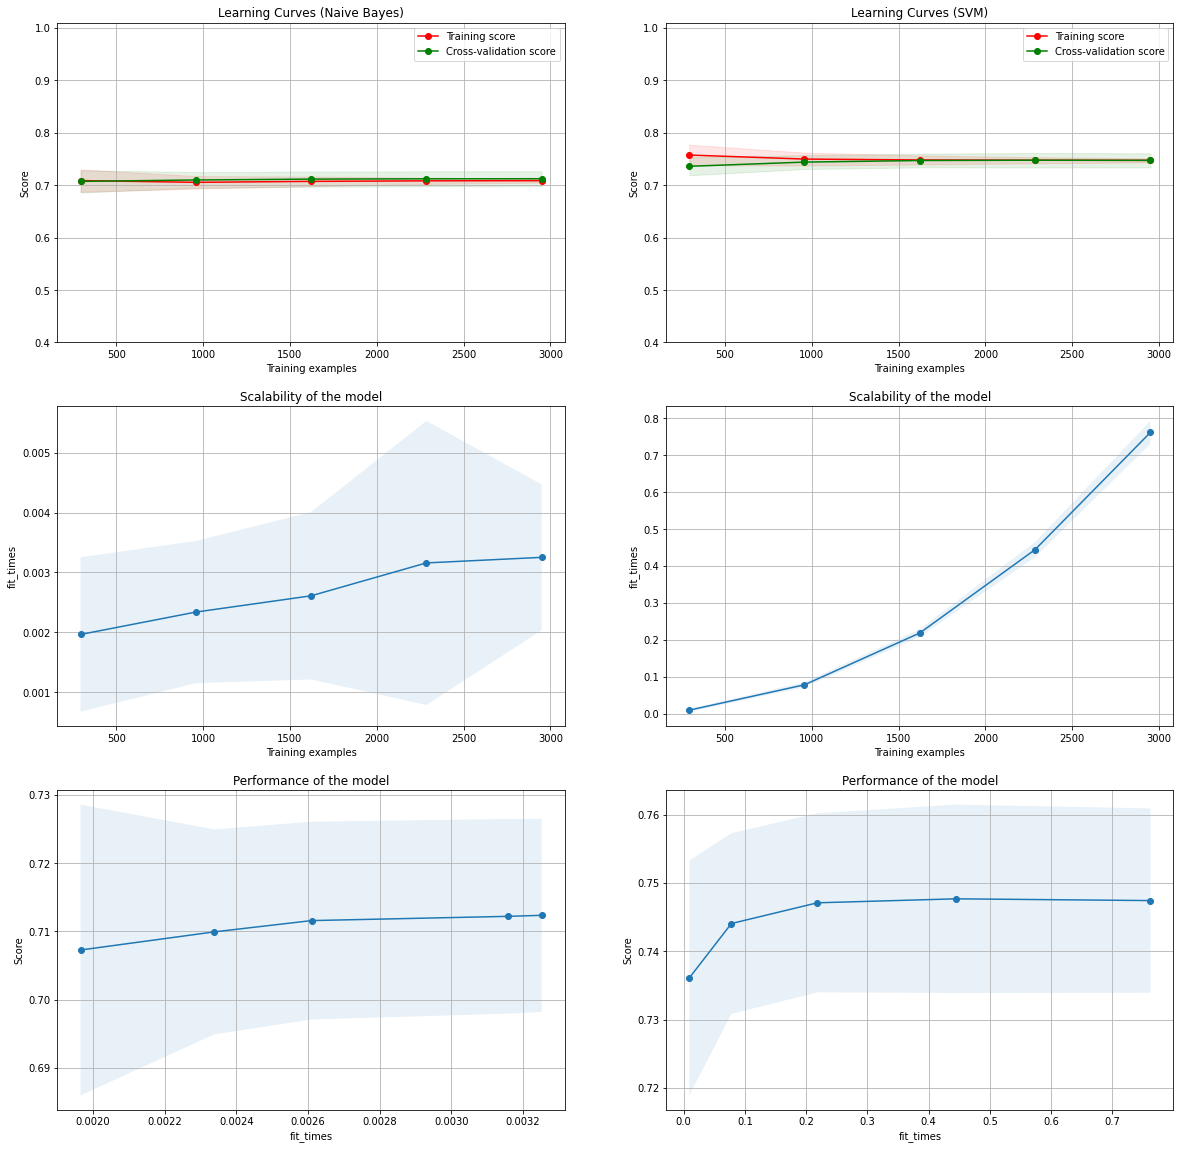

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,random_state = 0)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    acc = test_scores_mean[-1]

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt,acc


fig, axes = plt.subplots(3, 2, figsize=(20, 20))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plt,NB_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVC()
plt,svm_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
print("Naive Bayes Validation Accuracy: " + str(NB_acc*100) + "%")
print("Support Vector Machine Validation Accuracy: " + str(svm_acc*100) + "%")

Naive Bayes Validation Accuracy: 71.70596205962062%
Support Vector Machine Validation Accuracy: 74.09214092140924%


In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Naive Bayes test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Naive Bayes average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Naive Bayes f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Naive Bayes roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

Naive Bayes test accuracy: 0.7399783315276273
Naive Bayes average precision score: 0.6780577693238047
Naive Bayes f1_score: 0.7494780793319414
Naive Bayes roc_auc_score: 0.7396789098524619


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("SVM test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("SVM average precision score: " + str(average_precision_score(y_test, y_pred)))
print("SVM f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("SVM roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM test accuracy: 0.7562296858071506
SVM average precision score: 0.6968909687113084
SVM f1_score: 0.7593582887700534
SVM roc_auc_score: 0.756174810529578


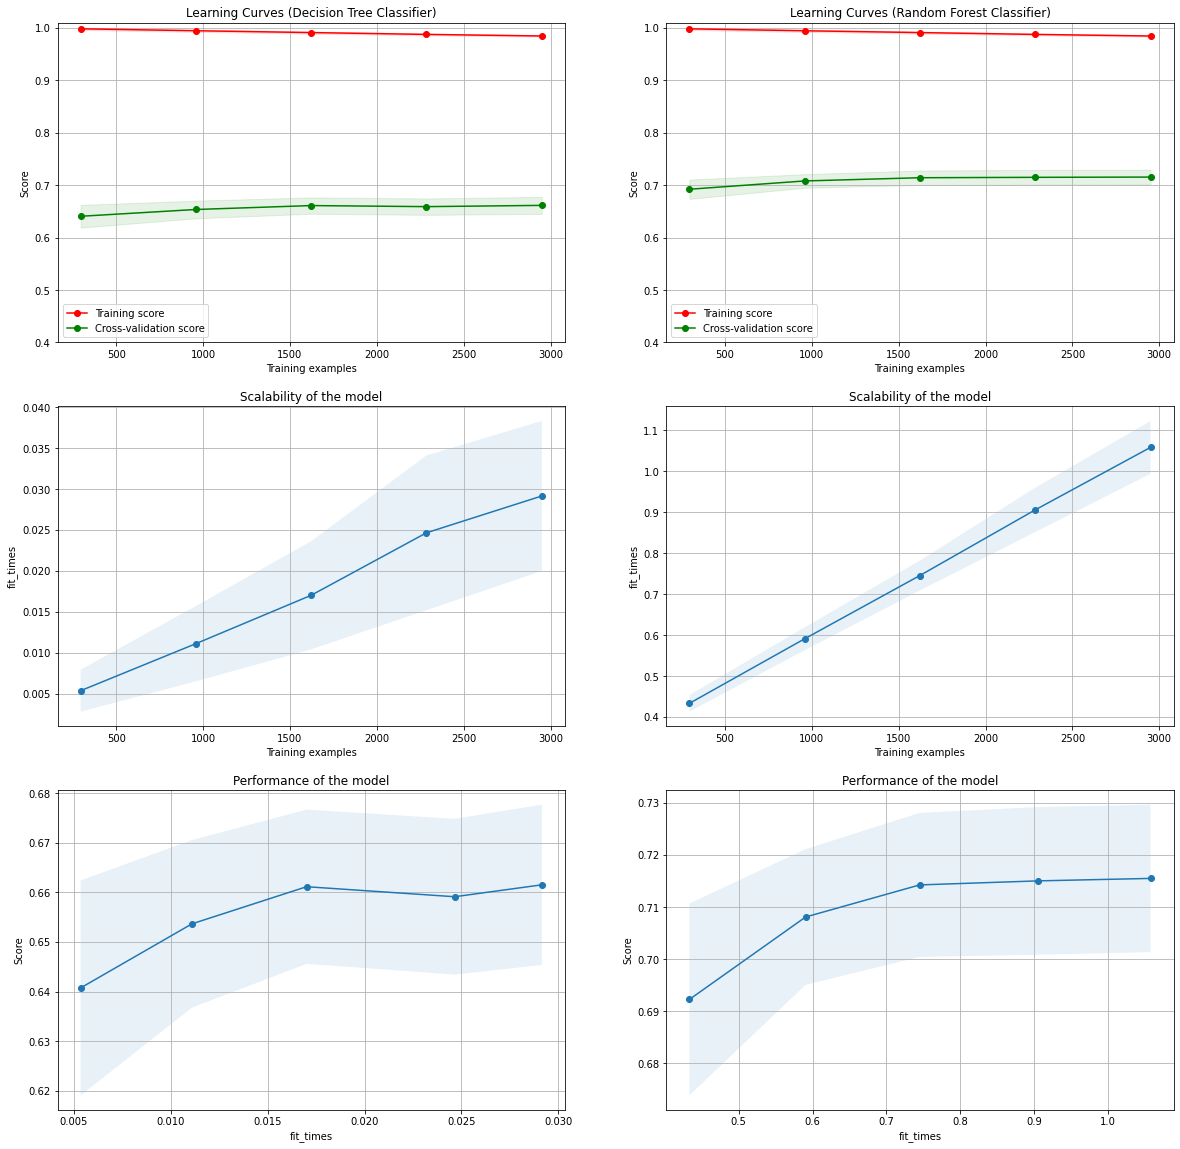

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

title = "Learning Curves (Decision Tree Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(random_state = random.seed(10))
plt,DT_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Random Forest Classifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(random_state = random.seed(10))
plt,RF_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
print("Decision Tree Accuracy: " + str(DT_acc*100) + "%")
print("Random Forest Accuracy: " + str(RF_acc*100) + "%")

Decision Tree Accuracy: 66.15040650406505%
Random Forest Accuracy: 71.54878048780492%


In [ ]:
clf = DecisionTreeClassifier(random_state = random.seed(10))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Decision Tree test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Decision Tree average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Decision Tree f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Decision Tree roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

Decision Tree test accuracy: 0.6879739978331527
Decision Tree average precision score: 0.6341551930372067
Decision Tree f1_score: 0.6883116883116883
Decision Tree roc_auc_score: 0.6880288502174097


In [ ]:
clf = RandomForestClassifier(random_state = random.seed(10))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Random Forest test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Random Forest average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Random Forest f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Random Forest roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest test accuracy: 0.7215601300108342
Random Forest average precision score: 0.6625392292766853
Random Forest f1_score: 0.7274655355249204
Random Forest roc_auc_score: 0.7214174359744931


## Question 1 Added Data

In [ ]:
import numpy as np
np.random.seed(10)

data = pd.read_csv('/content/drive/My Drive/DAM Assignment/Cleaned Data/combined - final.csv')
data.dropna(inplace=True)
data.head()

resultId  raceId  ...  circuit_error_rate  label
0         1      18  ...            0.126246      1
1         2      18  ...            0.126246      1
2         3      18  ...            0.126246      1
3         4      18  ...            0.126246      1
4         5      18  ...            0.126246      1

[5 rows x 20 columns]

In [ ]:
data = data.drop(['resultId', 'raceId'], axis=1)

data['driver_error_rate'] = data['driver_error_rate']*1000
data['constructor_error_rate'] = data['constructor_error_rate']*100
data['circuit_error_rate'] = data['circuit_error_rate']*100
data.head()

driverId  constructorId  ...  circuit_error_rate  label
0         1              1  ...           12.624585      1
1         2              2  ...           12.624585      1
2         3              3  ...           12.624585      1
3         4              4  ...           12.624585      1
4         5              1  ...           12.624585      1

[5 rows x 18 columns]

In [ ]:
data.constructorId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  23, 131, 205, 166, 164, 208, 206,
       207, 210, 209])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4611 entries, 0 to 4785
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   driverId                  4611 non-null   int64  
 1   constructorId             4611 non-null   int64  
 2   grid                      4611 non-null   int64  
 3   circuitId                 4611 non-null   int64  
 4   turns                     4611 non-null   int64  
 5   lap_length                4611 non-null   float64
 6   race_laps                 4611 non-null   int64  
 7   race_distance             4611 non-null   float64
 8   max_speed                 4611 non-null   float64
 9   drs_zone                  4611 non-null   int64  
 10  full_throttle_percentage  4611 non-null   float64
 11  longest_flatout_section   4611 non-null   int64  
 12  downforce_level           4611 non-null   float64
 13  gear_changes_per_lap      4611 non-null   int64  
 14  driver_e

In [ ]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1:]

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns = X.columns, index=X.index)
X.head()

driverId  constructorId  ...  constructor_error_rate  circuit_error_rate
0  0.000000       0.000000  ...                0.486353            0.573643
1  0.001196       0.004785  ...                0.271429            0.573643
2  0.002392       0.009569  ...                0.392279            0.573643
3  0.003589       0.014354  ...                0.414074            0.573643
4  0.004785       0.000000  ...                0.486353            0.573643

[5 rows x 17 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_test_inverse = min_max_scaler.inverse_transform(X_test)

In [ ]:
drivers = []
constructors = []

for i in X_test_inverse:
  drivers.append(i[0])
  constructors.append(i[1])

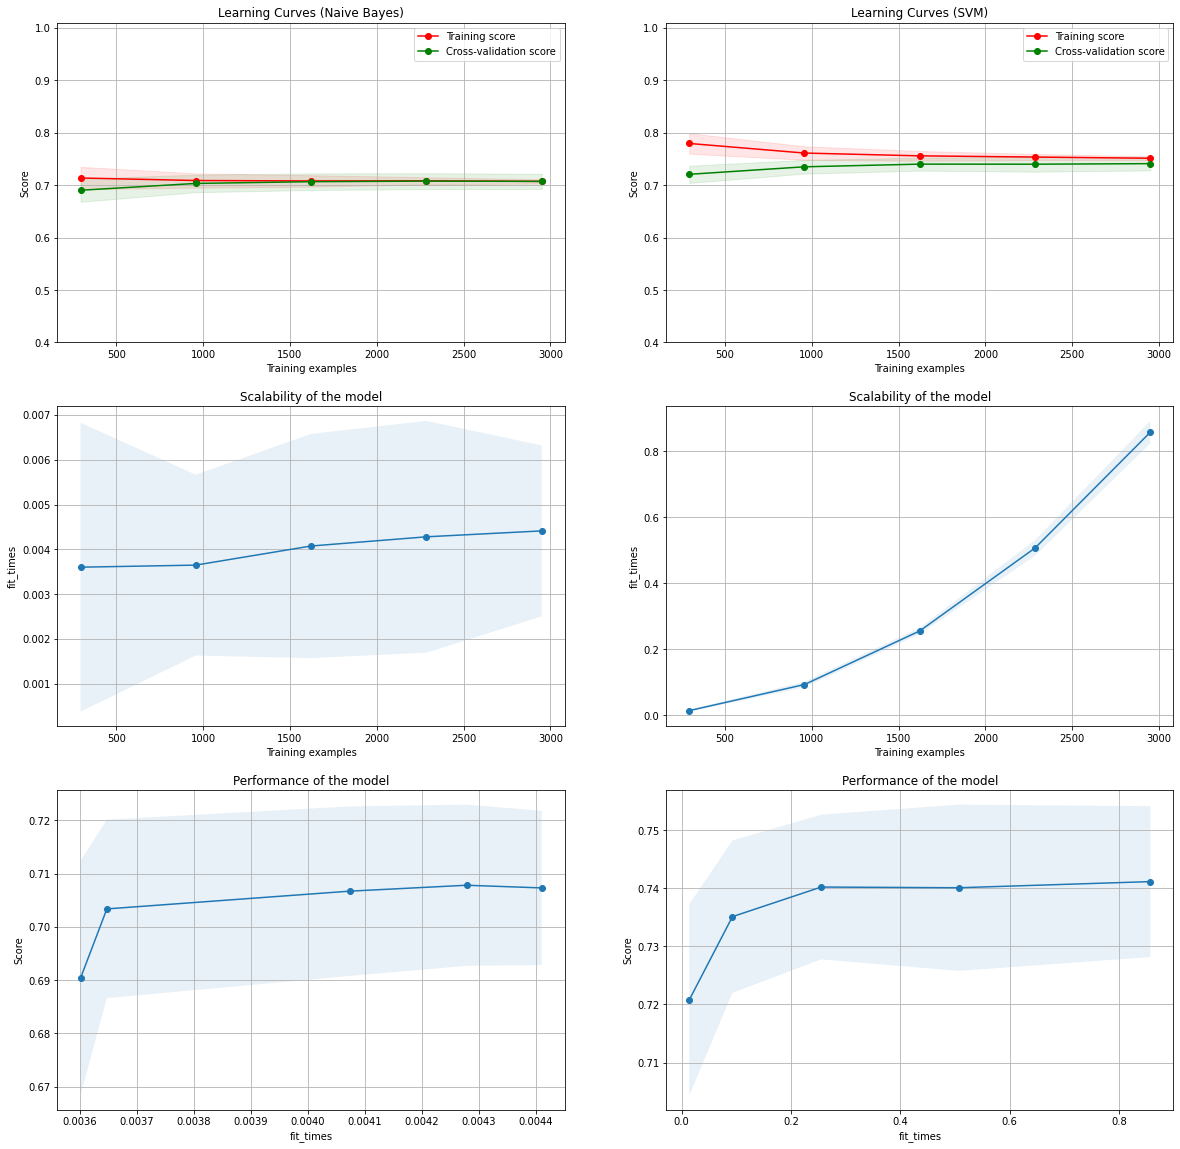

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,random_state = 0)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    acc = test_scores_mean[-1]

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt,acc


fig, axes = plt.subplots(3, 2, figsize=(20, 20))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plt,NB_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVC()
plt,svm_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
print("Naive Bayes Validation Accuracy: " + str(NB_acc*100) + "%")
print("Support Vector Machine Validation Accuracy: " + str(svm_acc*100) + "%")

Naive Bayes Validation Accuracy: 70.73035230352305%
Support Vector Machine Validation Accuracy: 74.11246612466127%


In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Naive Bayes test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Naive Bayes average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Naive Bayes f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Naive Bayes roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

Naive Bayes test accuracy: 0.7443120260021668
Naive Bayes average precision score: 0.6772063652022462
Naive Bayes f1_score: 0.7644710578842316
Naive Bayes roc_auc_score: 0.7435481447394371


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("SVM test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("SVM average precision score: " + str(average_precision_score(y_test, y_pred)))
print("SVM f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("SVM roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM test accuracy: 0.7605633802816901
SVM average precision score: 0.7003409835391561
SVM f1_score: 0.7651434643995749
SVM roc_auc_score: 0.760445525492811


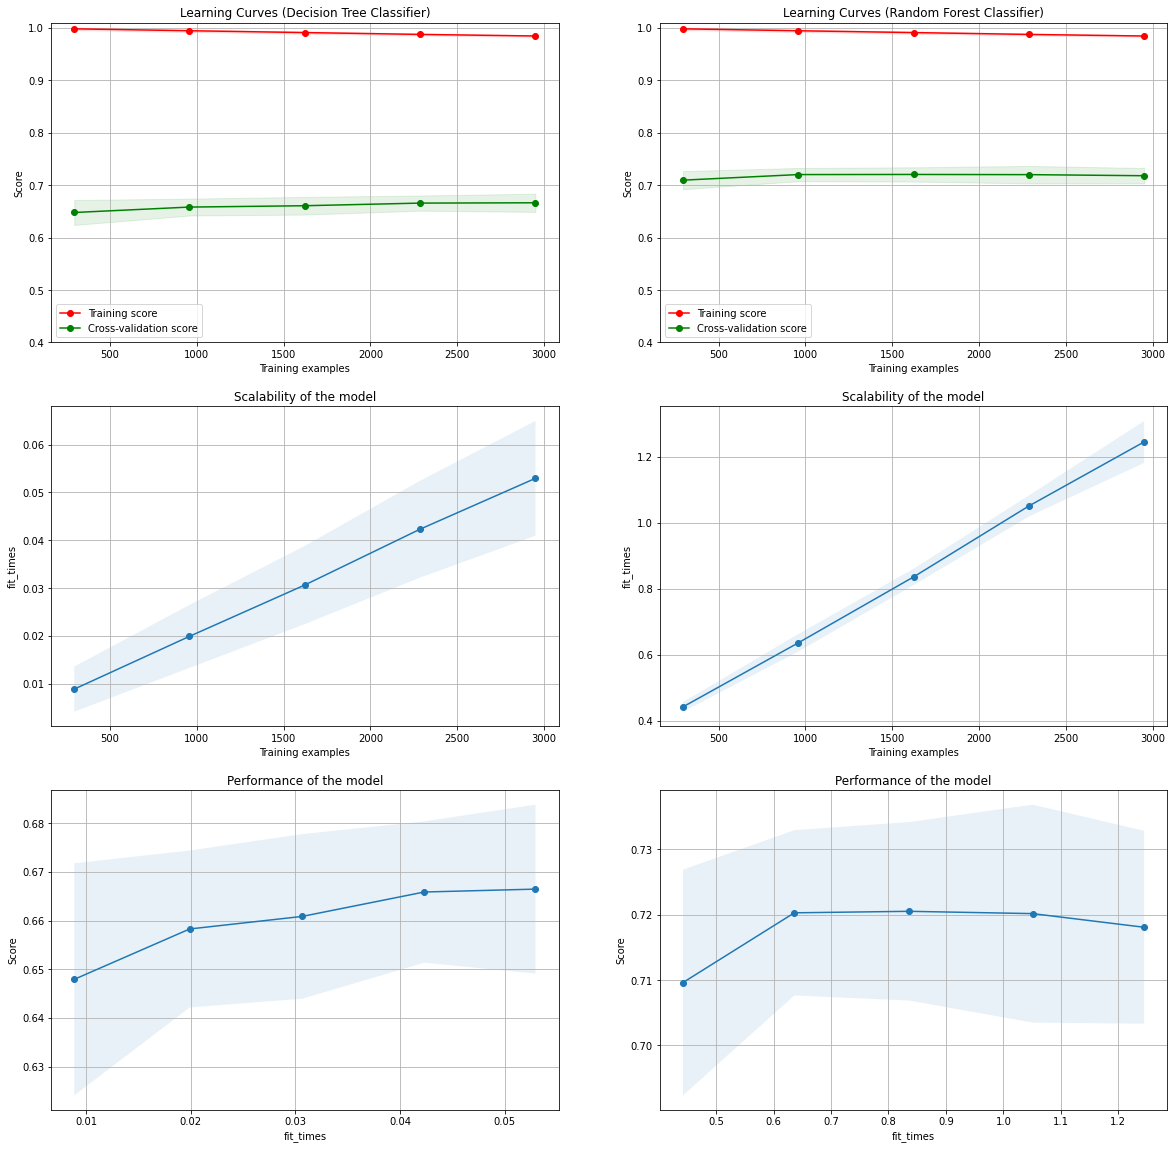

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

title = "Learning Curves (Decision Tree Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(random_state = random.seed(10))
plt,DT_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Random Forest Classifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(random_state = random.seed(10))
plt,RF_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
print("Decision Tree Accuracy: " + str(DT_acc*100) + "%")
print("Random Forest Accuracy: " + str(RF_acc*100) + "%")

Decision Tree Accuracy: 66.64498644986449%
Random Forest Accuracy: 71.80623306233065%


In [ ]:
clf = DecisionTreeClassifier(random_state = random.seed(10))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Decision Tree test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Decision Tree average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Decision Tree f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Decision Tree roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

Decision Tree test accuracy: 0.6868905742145178
Decision Tree average precision score: 0.6345291544069638
Decision Tree f1_score: 0.682068206820682
Decision Tree roc_auc_score: 0.6871038025563245


In [ ]:
clf = RandomForestClassifier(random_state = random.seed(10))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Random Forest test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Random Forest average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Random Forest f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Decision Tree roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest test accuracy: 0.7258938244853738
Random Forest average precision score: 0.6665627168393543
Random Forest f1_score: 0.7317073170731706
Decision Tree roc_auc_score: 0.725751542528714


### Reduced Dataset

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
print(X_new.shape)
sec = SelectKBest(chi2, k=5).fit(X, y)
selected = sec.get_support()
print("Selected features: ")
features = ['driverId','constructorId','grid','circuitId','turns','lap_length','race_laps','race_distance','max_speed','drs_zone','full_throttle_percentage','longest_flatout_section','downforce_level','gear_changes_per_lap','driver_error_rate','constructor_error_rate','circuit_error_rate']
for i in range(0,len(selected)):
  if(selected[i]==True):
    print(features[i])

(4611, 5)
Selected features: 
driverId
constructorId
grid
driver_error_rate
constructor_error_rate


(4611, 5)


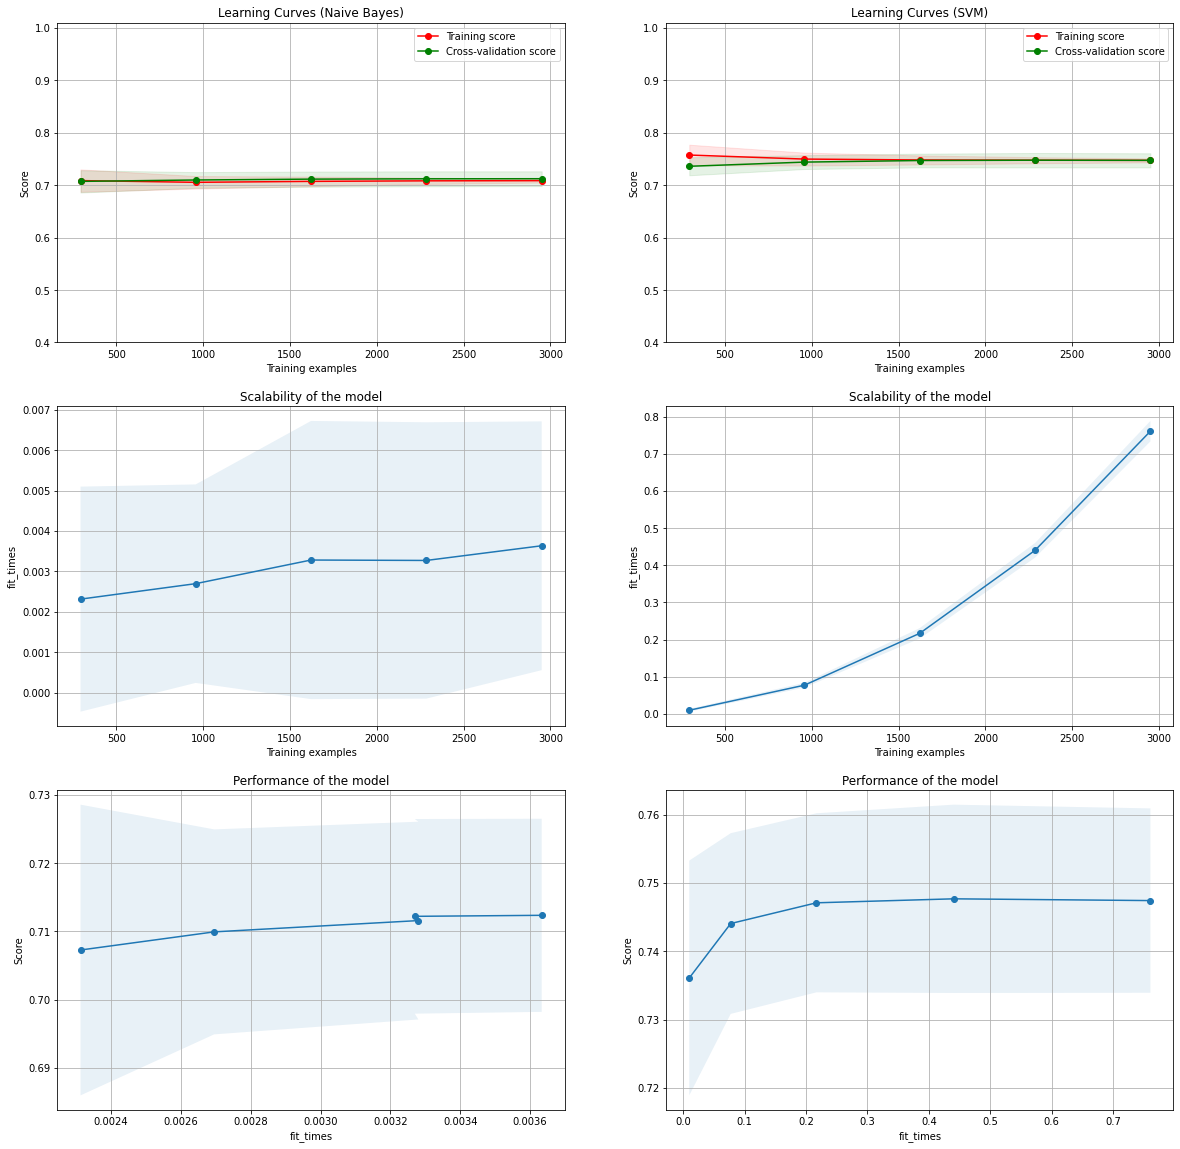

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
print(X_new.shape)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

fig, axes = plt.subplots(3, 2, figsize=(20, 20))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plt,NB_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVC()
plt,svm_acc = plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
print("Naive Bayes Accuracy: " + str(NB_acc*100) + "%")
print("Support Vector Machine Accuracy: " + str(svm_acc*100) + "%")

Naive Bayes Accuracy: 71.23577235772359%
Support Vector Machine Accuracy: 74.74119241192413%


In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Naive Bayes test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Naive Bayes average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Naive Bayes f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Naive Bayes roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

Naive Bayes test accuracy: 0.7486457204767064
Naive Bayes average precision score: 0.680974829229451
Naive Bayes f1_score: 0.7689243027888445
Naive Bayes roc_auc_score: 0.7478611207633287


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("SVM test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("SVM average precision score: " + str(average_precision_score(y_test, y_pred)))
print("SVM f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("SVM roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM test accuracy: 0.7627302275189599
SVM average precision score: 0.7022154702356898
SVM f1_score: 0.7677624602332981
SVM roc_auc_score: 0.762591448239592


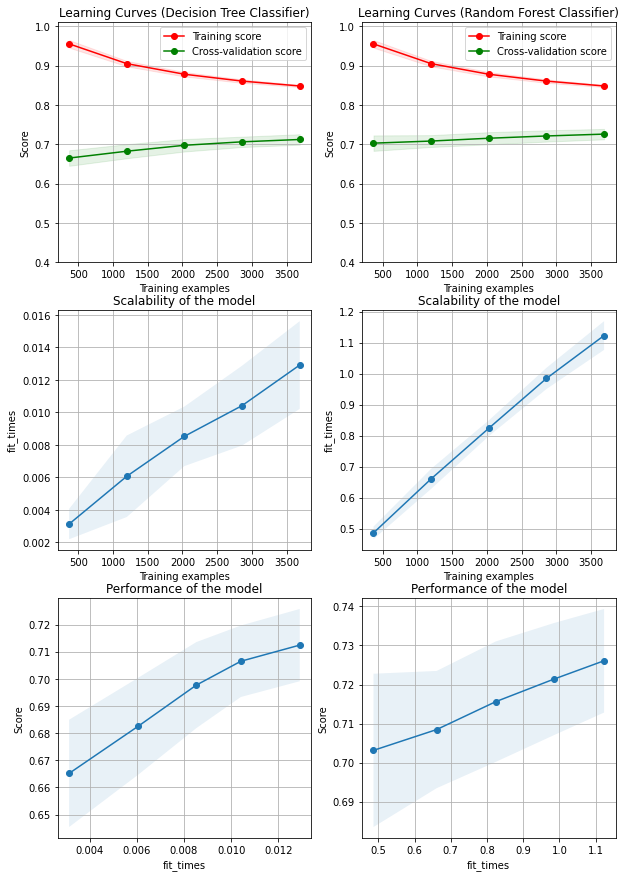

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Decision Tree Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(random_state = random.seed(10))
plt,DT_acc = plot_learning_curve(estimator, title, X_new, y, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Random Forest Classifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(random_state = random.seed(10))
plt,RF_acc = plot_learning_curve(estimator, title, X_new, y, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
print("Decision Tree Accuracy: " + str(DT_acc*100) + "%")
print("Random Forest Accuracy: " + str(RF_acc*100) + "%")

Decision Tree Accuracy: 71.24268689057422%
Random Forest Accuracy: 72.60888407367281%


In [ ]:
clf = DecisionTreeClassifier(random_state = random.seed(10))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Decision Tree test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Decision Tree average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Decision Tree f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Decision Tree roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

Decision Tree test accuracy: 0.7356446370530878
Decision Tree average precision score: 0.6789437273994413
Decision Tree f1_score: 0.7342047930283223
Decision Tree roc_auc_score: 0.7357674139048281


In [ ]:
clf = RandomForestClassifier(random_state = random.seed(10))
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Random Forest test accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Random Forest average precision score: " + str(average_precision_score(y_test, y_pred)))
print("Random Forest f1_score: " + str(f1_score(y_test, y_pred, average='binary'))) 
print("Random Forest roc_auc_score: " + str(roc_auc_score(y_test, y_pred))) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest test accuracy: 0.7562296858071506
Random Forest average precision score: 0.6960203674829991
Random Forest f1_score: 0.7608926673751328
Random Forest roc_auc_score: 0.7561114189385899


### Neural Network **Classifier**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback

histories = {}

np.random.seed(10)
tf.random.set_seed(10)

# create the model
l2 = tf.keras.regularizers.l2(l2=1e-6)

model = Sequential([
    Dense(20, activation='relu', kernel_regularizer=l2),
    #Dense(10, activation='relu', kernel_regularizer=l2),
    Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.SGD(lr=0.001, decay = 1e-6)

model.compile(optimizer=opt,
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = '/content/drive/My Drive/DAM Assignment/models/qn1.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# train the model
histories['qn1'] =model.fit(X_train, y_train,
                            epochs=200,
                            verbose = 2,
                            batch_size=4,
                            callbacks = [model_checkpoint_callback],
                            validation_data=(X_test, y_test))

Epoch 1/200
922/922 - 1s - loss: 1.1235 - accuracy: 0.5466 - val_loss: 0.9652 - val_accuracy: 0.6685
Epoch 2/200
922/922 - 1s - loss: 0.8875 - accuracy: 0.6375 - val_loss: 0.8173 - val_accuracy: 0.6468
Epoch 3/200
922/922 - 1s - loss: 0.7856 - accuracy: 0.6459 - val_loss: 0.7445 - val_accuracy: 0.6609
Epoch 4/200
922/922 - 1s - loss: 0.7314 - accuracy: 0.6678 - val_loss: 0.7013 - val_accuracy: 0.6891
Epoch 5/200
922/922 - 1s - loss: 0.6969 - accuracy: 0.6912 - val_loss: 0.6714 - val_accuracy: 0.7075
Epoch 6/200
922/922 - 1s - loss: 0.6722 - accuracy: 0.7183 - val_loss: 0.6487 - val_accuracy: 0.7291
Epoch 7/200
922/922 - 1s - loss: 0.6532 - accuracy: 0.7272 - val_loss: 0.6304 - val_accuracy: 0.7476
Epoch 8/200
922/922 - 1s - loss: 0.6375 - accuracy: 0.7335 - val_loss: 0.6148 - val_accuracy: 0.7486
Epoch 9/200
922/922 - 1s - loss: 0.6242 - accuracy: 0.7332 - val_loss: 0.6013 - val_accuracy: 0.7595
Epoch 10/200
922/922 - 1s - loss: 0.6125 - accuracy: 0.7332 - val_loss: 0.5895 - val_accura

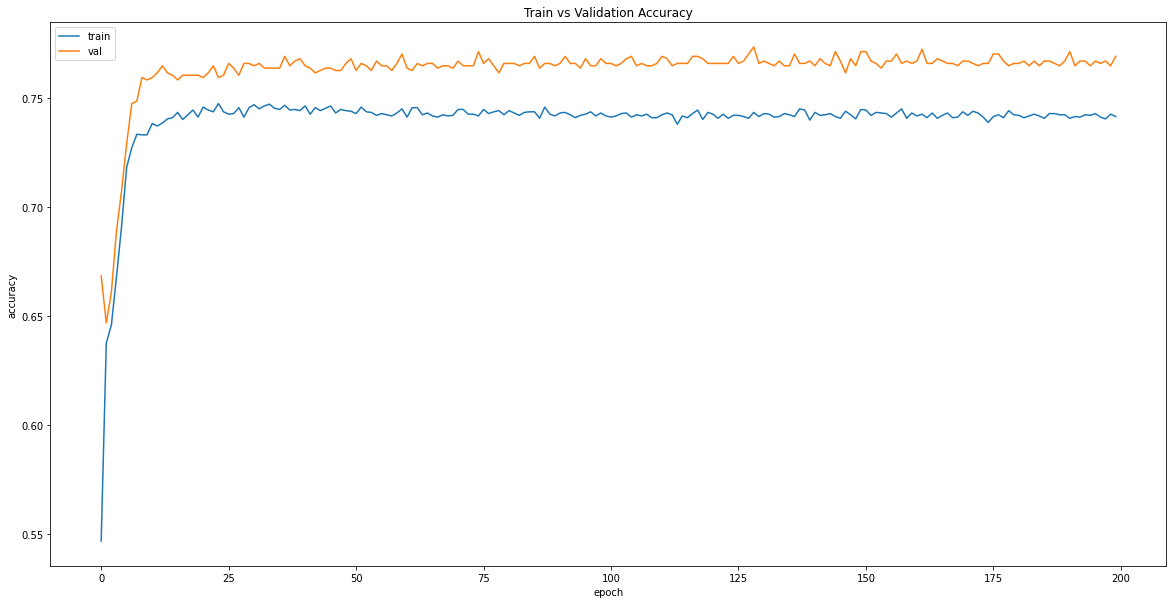

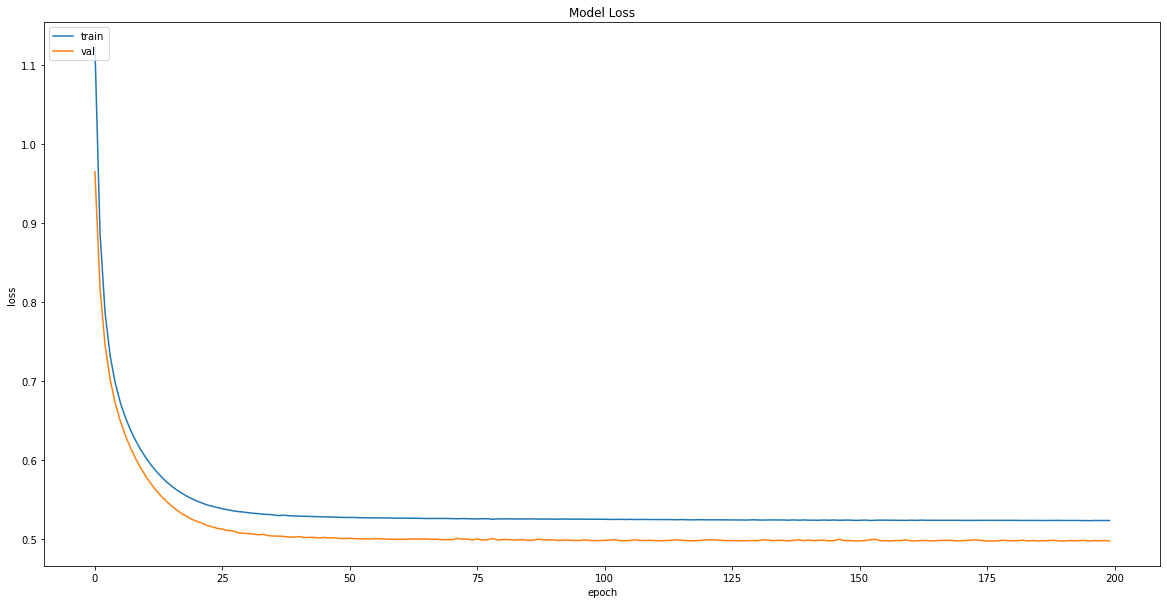

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['accuracy'])
plt.plot(histories['qn1'].history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
drivers = np.round(drivers, 0)
constructors = np.round(constructors, 0)

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/DAM Assignment/models/qn1.hdf5')

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([[8.66523683e-01, 1.33373305e-01, 3.49885886e-05, 6.79451041e-05],
       [4.02179390e-01, 5.96901357e-01, 4.19107295e-04, 5.00130700e-04],
       [8.92466366e-01, 1.07469425e-01, 2.08222518e-05, 4.33809982e-05],
       ...,
       [3.70852321e-01, 6.28915548e-01, 9.80922050e-05, 1.34133064e-04],
       [5.75146794e-01, 4.24734861e-01, 4.61000673e-05, 7.22838377e-05],
       [1.53046802e-01, 8.45594525e-01, 6.52228773e-04, 7.06521620e-04]],
      dtype=float32)

In [ ]:
labels = []

for i in predictions:
  labels.append(np.argmax(i))

In [ ]:
y_test['predicted'] = labels
y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  predicted
2547      1          0
3417      1          1
398       0          0
3174      0          1
2933      0          0
2591      1          0
3184      1          1
2140      0          0
1845      0          0
2842      1          1
2141      1          1
42        1          1
1670      0          0
2126      1          1
1215      0          1
1146      0          0
3614      0          0
4428      0          1
4652      1          1
746       0          0
844       0          0
4644      1          0
3219      1          1
560       0          0
2588      1          0
159       1          1
4060      0          0
2235      0          0
2008      0          0
3777      0          0
4298      0          0
2145      1          1
321       0          0
2480      1          1
1309      1          0
2631      1          1
3594      0          1
2050      1          1
1225      1          0
510       1          1
3475      1          1
1275      0          0
1528      0          1
2102      0          1
1483      1          1
4138      1          1
2544      1          1
2076      1          1
1096      1          1
3642      0          0
2249      0          0
3888      0          0
2368      0          0
3172      0          0
564       1          1
999       0          1
670       1          1
4252      1          1
2534      0          0
2657      0          0
750       1          1
533       1          0
130       0          0
1401      1          1
1644      1          1
2225      1          1
3959      1          1
4588      1          0
4176      0          0
1381      1          1
4394      0          0
3239      1          1
2575      0          0
961       1          1
4441      0          1
1524      1          0
1030      1          1
2904      1          0
3040      1          1
603       0          0
1834      1          1
3283      1          1
3031      0          0
3488      0          0
2821      1          1
1977      0          1
697       0          0
1548      0          1
3712      0          0
2797      1          1
2958      0          0
4311      0          0
1508      0          1
1906      1          1
990       1          0
4014      0          0
2099      0          0
739       0          0
3053      0          0
4558      1          1
4374      1          1
3921      0          0
3741      1          1
2676      1          1
1239      0          0
2673      1          1
2477      1          1
1911      1          1
3912      1          1
4587      1          0
1020      0          0
3813      0          0
818       1          0
1449      0          0
995       0          0
2753      0          0
3835      1          1
2307      0          0
567       1          1
1847      0          1
425       1          1
936       0          0
218       1          1
601       0          0
3446      1          1
1663      1          0
3775      1          1
709       1          0
220       1          1
4580      1          1
3179      1          1
367       1          1
4382      0          1
996       0          0
1346      1          1
1615      0          0
3549      1          1
4212      0          0
4194      0          0
3353      0          1
735       1          1
1812      1          1
1946      1          0
3136      0          1
2714      1          0
2338      1          1
2322      1          1
4117      0          0
2118      0          0
402       0          0
424       0          0
2921      1          1
3666      1          1
1858      0          0
4486      1          1
1515      0          0
4217      1          1
1265      1          0
2412      0          0
214       1          1
2610      1          0
4341      1          1
1996      0          1
170       0          1
3305      0          0
72        0          0
4246      0          1
3928      1          1
914       0          0
2987      1          1
4361      0          0
2651      1          1
417       0          0
104 

In [ ]:
y_test['drivers'] = drivers
y_test['constructors'] = constructors
y_test.reindex()
y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


label  predicted  drivers  constructors
2547      1          0    155.0          15.0
3417      1          1     17.0           9.0
398       0          0     16.0          12.0
3174      0          1    154.0         208.0
2933      0          0    817.0           5.0
2591      1          0     67.0           5.0
3184      1          1    154.0         208.0
2140      0          0     15.0         205.0
1845      0          0     16.0          10.0
2842      1          1     13.0           6.0
2141      1          1     20.0           9.0
42        1          1      9.0           2.0
1670      0          0     46.0          18.0
2126      1          1      3.0         131.0
1215      0          1     18.0          16.0
1146      0          0     11.0          16.0
3614      0          0     16.0          15.0
4428      0          1      1.0         131.0
4652      1          1      8.0           6.0
746       0          0     13.0           6.0
844       0          0     32.0           9.0
4644      1          0     13.0           3.0
3219      1          1      8.0         208.0
560       0          0     22.0          11.0
2588      1          0     16.0          10.0
159       1          1      8.0           6.0
4060      0          0    813.0         208.0
2235      0          0     15.0         205.0
2008      0          0     67.0           5.0
3777      0          0    826.0           5.0
4298      0          0    836.0         209.0
2145      1          1     16.0          10.0
321       0          0     18.0          11.0
2480      1          1     13.0           6.0
1309      1          0     17.0           3.0
2631      1          1      3.0         131.0
3594      0          1    817.0           9.0
2050      1          1     20.0           9.0
1225      1          0     33.0          17.0
510       1          1      2.0           2.0
3475      1          1      8.0         208.0
1275      0          0     14.0           9.0
1528      0          1     17.0          19.0
2102      0          1      1.0           1.0
1483      1          1     23.0           3.0
4138      1          1     20.0           6.0
2544      1          1      2.0           4.0
2076      1          1    155.0           7.0
1096      1          1     32.0           9.0
3642      0          0    825.0           1.0
2249      0          0      5.0         205.0
3888      0          0     18.0           1.0
2368      0          0     10.0         166.0
3172      0          0    808.0         207.0
564       1          1     13.0           6.0
999       0          1      4.0           4.0
670       1          1      1.0           1.0
4252      1          1     20.0           6.0
2534      0          0     15.0         205.0
2657      0          0    808.0           4.0
750       1          1     13.0           6.0
533       1          0     21.0           4.0
130       0          0      7.0           5.0
1401      1          1     21.0           4.0
1644      1          1     13.0          15.0
2225      1          1     16.0          10.0
3959      1          1    826.0           9.0
4588      1          0    825.0         210.0
4176      0          0    836.0         209.0
1381      1          1     31.0           1.0
4394      0          0     18.0           1.0
3239      1          1      1.0           1.0
2575      0          0     22.0           3.0
961       1          1     30.0           6.0
4441      0          1    154.0         210.0
1524      1          0     18.0          16.0
1030      1          1     15.0           7.0
2904      1          0      8.0         208.0
3040      1          1     17.0           9.0
603       0          0     14.0           9.0
1834      1          1      1.0           1.0
3283      1          1      1.0         131.0
3031      0          0      5.0         207.0
3488      0          0    814.0          10.0
2821      1          1     30.0         131.0
1977      0          1      4.0           4.0
697 

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
y_test

label  predicted  drivers  constructors
2547      1          0    155.0          15.0
3417      1          1     17.0           9.0
398       0          0     16.0          12.0
3174      0          1    154.0         208.0
2933      0          0    817.0           5.0
2591      1          0     67.0           5.0
3184      1          1    154.0         208.0
2140      0          0     15.0         205.0
1845      0          0     16.0          10.0
2842      1          1     13.0           6.0
2141      1          1     20.0           9.0
42        1          1      9.0           2.0
1670      0          0     46.0          18.0
2126      1          1      3.0         131.0
1215      0          1     18.0          16.0
1146      0          0     11.0          16.0
3614      0          0     16.0          15.0
4428      0          1      1.0         131.0
4652      1          1      8.0           6.0
746       0          0     13.0           6.0
844       0          0     32.0           9.0
4644      1          0     13.0           3.0
3219      1          1      8.0         208.0
560       0          0     22.0          11.0
2588      1          0     16.0          10.0
159       1          1      8.0           6.0
4060      0          0    813.0         208.0
2235      0          0     15.0         205.0
2008      0          0     67.0           5.0
3777      0          0    826.0           5.0
4298      0          0    836.0         209.0
2145      1          1     16.0          10.0
321       0          0     18.0          11.0
2480      1          1     13.0           6.0
1309      1          0     17.0           3.0
2631      1          1      3.0         131.0
3594      0          1    817.0           9.0
2050      1          1     20.0           9.0
1225      1          0     33.0          17.0
510       1          1      2.0           2.0
3475      1          1      8.0         208.0
1275      0          0     14.0           9.0
1528      0          1     17.0          19.0
2102      0          1      1.0           1.0
1483      1          1     23.0           3.0
4138      1          1     20.0           6.0
2544      1          1      2.0           4.0
2076      1          1    155.0           7.0
1096      1          1     32.0           9.0
3642      0          0    825.0           1.0
2249      0          0      5.0         205.0
3888      0          0     18.0           1.0
2368      0          0     10.0         166.0
3172      0          0    808.0         207.0
564       1          1     13.0           6.0
999       0          1      4.0           4.0
670       1          1      1.0           1.0
4252      1          1     20.0           6.0
2534      0          0     15.0         205.0
2657      0          0    808.0           4.0
750       1          1     13.0           6.0
533       1          0     21.0           4.0
130       0          0      7.0           5.0
1401      1          1     21.0           4.0
1644      1          1     13.0          15.0
2225      1          1     16.0          10.0
3959      1          1    826.0           9.0
4588      1          0    825.0         210.0
4176      0          0    836.0         209.0
1381      1          1     31.0           1.0
4394      0          0     18.0           1.0
3239      1          1      1.0           1.0
2575      0          0     22.0           3.0
961       1          1     30.0           6.0
4441      0          1    154.0         210.0
1524      1          0     18.0          16.0
1030      1          1     15.0           7.0
2904      1          0      8.0         208.0
3040      1          1     17.0           9.0
603       0          0     14.0           9.0
1834      1          1      1.0           1.0
3283      1          1      1.0         131.0
3031      0          0      5.0         207.0
3488      0          0    814.0          10.0
2821      1          1     30.0         131.0
1977      0          1      4.0           4.0
697 

In [ ]:
actual = y_test['label'].values

In [ ]:
count = 0

for i in range(0,len(labels)):
  if(labels[i] == actual[i]):
    count += 1

print("test accuracy: " + str((count/len(labels))*100))

test accuracy: 77.35644637053088


## Qn 2 Predict Race Time

In [ ]:
data = pd.read_csv('/content/drive/My Drive/DAM Assignment/Cleaned Data/question2_new.csv')
data.dropna(inplace=True)
#data.set_index('year', inplace=True)
data.head()

driverId  constructorId  ...  prev_year_4_lap  fastestLapTime
0         1              1  ...            90600           92000
1         9              2  ...            90600           92000
2         5              1  ...            90600           92000
3        13              6  ...            90600           92000
4         2              2  ...            90600           92000

[5 rows x 20 columns]

In [ ]:
data['fastest_q'] = data['fastest_q']/60000
data['prev_year_1_lap'] = data['prev_year_1_lap']/60000
data['prev_year_2_lap'] = data['prev_year_2_lap']/60000
data['prev_year_3_lap'] = data['prev_year_3_lap']/60000
data['prev_year_4_lap'] = data['prev_year_4_lap']/60000
data.head()

driverId  constructorId  ...  prev_year_4_lap  fastestLapTime
0         1              1  ...             1.51           92000
1         9              2  ...             1.51           92000
2         5              1  ...             1.51           92000
3        13              6  ...             1.51           92000
4         2              2  ...             1.51           92000

[5 rows x 20 columns]

In [ ]:
target_df = data[['year','circuitId','fastestLapTime']]
target_df.head()

year  circuitId  fastestLapTime
0  2008          1           92000
1  2008          1           92000
2  2008          1           92000
3  2008          1           92000
4  2008          1           92000

In [ ]:
target_df = target_df.groupby(['year','circuitId']).mean()
target_df.head()

fastestLapTime
year circuitId                
2008 1                   92000
     2                  100300
     3                   96100
     4                   86900
     6                  102100

In [ ]:
target_df = target_df.reset_index()
target_df.head()

year  circuitId  fastestLapTime
0  2008          1           92000
1  2008          2          100300
2  2008          3           96100
3  2008          4           86900
4  2008          6          102100

In [ ]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   year            125 non-null    int64
 1   circuitId       125 non-null    int64
 2   fastestLapTime  125 non-null    int64
dtypes: int64(3)
memory usage: 3.1 KB


In [ ]:
data.drop(['fastestLapTime'], 1, inplace=True)
data.head()

driverId  constructorId  ...  prev_year_3_lap  prev_year_4_lap
0         1              1  ...         1.551667             1.51
1         9              2  ...         1.551667             1.51
2         5              1  ...         1.551667             1.51
3        13              6  ...         1.551667             1.51
4         2              2  ...         1.551667             1.51

[5 rows x 19 columns]

In [ ]:
data.drop(['driverId','constructorId'], 1, inplace=True)
data_groupby = data.groupby(['year','circuitId']).mean()
data_groupby.head()

turns  lap_length  ...  prev_year_3_lap  prev_year_4_lap
year circuitId                     ...                                  
2008 1             16       5.303  ...         1.551667         1.510000
     2             15       5.543  ...         1.726667         1.668333
     3             15       5.412  ...         1.625000         1.585000
     4             16       4.655  ...         1.348333         1.390000
     6             19       3.337  ...         1.366667         1.365000

[5 rows x 15 columns]

In [ ]:
data_groupby = data_groupby.reset_index()
data_groupby.head()

year  circuitId  turns  ...  prev_year_2_lap  prev_year_3_lap  prev_year_4_lap
0  2008          1     16  ...         1.690000         1.551667         1.510000
1  2008          2     15  ...         1.713333         1.726667         1.668333
2  2008          3     15  ...         1.638333         1.625000         1.585000
3  2008          4     16  ...         1.373333         1.348333         1.390000
4  2008          6     19  ...         1.318333         1.366667         1.365000

[5 rows x 17 columns]

In [ ]:
data_groupby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      125 non-null    int64  
 1   circuitId                 125 non-null    int64  
 2   turns                     125 non-null    int64  
 3   lap_length                125 non-null    float64
 4   race_laps                 125 non-null    int64  
 5   race_distance             125 non-null    float64
 6   max_speed                 125 non-null    float64
 7   drs_zone                  125 non-null    int64  
 8   full_throttle_percentage  125 non-null    float64
 9   longest_flatout_section   125 non-null    int64  
 10  downforce_level           125 non-null    int64  
 11  gear_changes_per_lap      125 non-null    int64  
 12  fastest_q                 125 non-null    float64
 13  prev_year_1_lap           125 non-null    float64
 14  prev_year_

In [ ]:
year_circuit_df = data_groupby[['year','circuitId']]
data_groupby.drop(['year','circuitId'], 1, inplace=True)
year_circuit_df.head()

year  circuitId
0  2008          1
1  2008          2
2  2008          3
3  2008          4
4  2008          6

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_groupby)
data_groupby = pd.DataFrame(x_scaled, columns = data_groupby.columns, index=data_groupby.index)
data_groupby.head()

turns  lap_length  ...  prev_year_3_lap  prev_year_4_lap
0  0.357143    0.536133  ...         0.178042         0.153314
1  0.285714    0.601582  ...         0.281899         0.247280
2  0.285714    0.565858  ...         0.221563         0.197824
3  0.357143    0.359422  ...         0.057369         0.082097
4  0.571429    0.000000  ...         0.068249         0.067260

[5 rows x 15 columns]

In [ ]:
data_groupby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   turns                     125 non-null    float64
 1   lap_length                125 non-null    float64
 2   race_laps                 125 non-null    float64
 3   race_distance             125 non-null    float64
 4   max_speed                 125 non-null    float64
 5   drs_zone                  125 non-null    float64
 6   full_throttle_percentage  125 non-null    float64
 7   longest_flatout_section   125 non-null    float64
 8   downforce_level           125 non-null    float64
 9   gear_changes_per_lap      125 non-null    float64
 10  fastest_q                 125 non-null    float64
 11  prev_year_1_lap           125 non-null    float64
 12  prev_year_2_lap           125 non-null    float64
 13  prev_year_3_lap           125 non-null    float64
 14  prev_year_

In [ ]:
sequential_data = []

for i in data_groupby.values:
    arr = np.array([n for n in i])
    sequential_data.append(arr)

In [ ]:
target_values=target_df['fastestLapTime'].values/60000

In [ ]:
X = sequential_data
y = target_values

In [ ]:
X  = np.array(X).reshape(125,15)
y = np.array(y).reshape(125,1)

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size = 0.25,
                                                                    random_state=10)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(93, 15) (93, 1)
(32, 15) (32, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

histories={}

np.random.seed(10)
tf.random.set_seed(10)

l2 = tf.keras.regularizers.l2(1e-3)

print(l2)

# create a network
model = Sequential([
        Dense(10, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(10, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(1)
])

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['qn1'] = model.fit(X_train, y_train,
                             epochs=500,
                             batch_size=4,
                             verbose = 2,
                             validation_data=(X_test, y_test))

Epoch 1/500
24/24 - 0s - loss: 0.8357 - mse: 0.8153 - val_loss: 0.2882 - val_mse: 0.2680
Epoch 2/500
24/24 - 0s - loss: 0.6420 - mse: 0.6220 - val_loss: 0.3243 - val_mse: 0.3046
Epoch 3/500
24/24 - 0s - loss: 0.6366 - mse: 0.6170 - val_loss: 0.3370 - val_mse: 0.3176
Epoch 4/500
24/24 - 0s - loss: 0.6632 - mse: 0.6439 - val_loss: 0.2405 - val_mse: 0.2214
Epoch 5/500
24/24 - 0s - loss: 0.5857 - mse: 0.5666 - val_loss: 0.2166 - val_mse: 0.1977
Epoch 6/500
24/24 - 0s - loss: 0.4983 - mse: 0.4794 - val_loss: 0.1906 - val_mse: 0.1718
Epoch 7/500
24/24 - 0s - loss: 0.5139 - mse: 0.4952 - val_loss: 0.2169 - val_mse: 0.1984
Epoch 8/500
24/24 - 0s - loss: 0.5251 - mse: 0.5067 - val_loss: 0.2480 - val_mse: 0.2297
Epoch 9/500
24/24 - 0s - loss: 0.3527 - mse: 0.3345 - val_loss: 0.2018 - val_mse: 0.1836
Epoch 10/500
24/24 - 0s - loss: 0.3855 - mse: 0.3674 - val_loss: 0.2285 - val_mse: 0.2105
Epoch 11/500
24/24 - 0s - loss: 0.3829 - mse: 0.3649 - val_loss: 0.2008 - val_mse: 0.1829
Epoch 12/500
24/24 

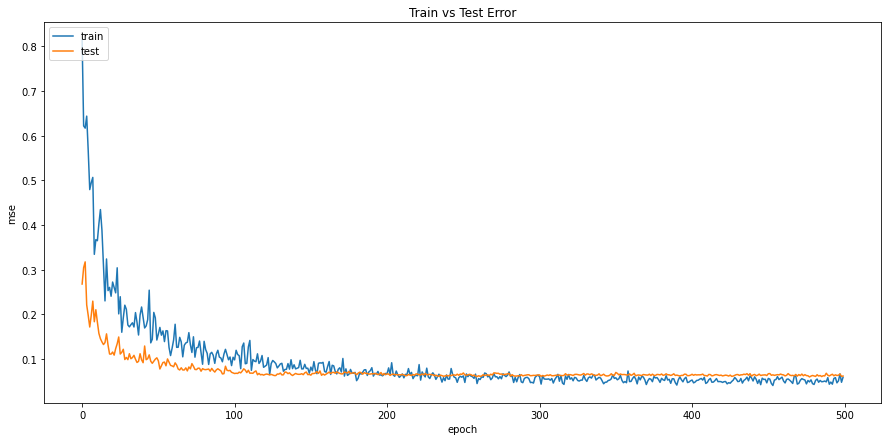

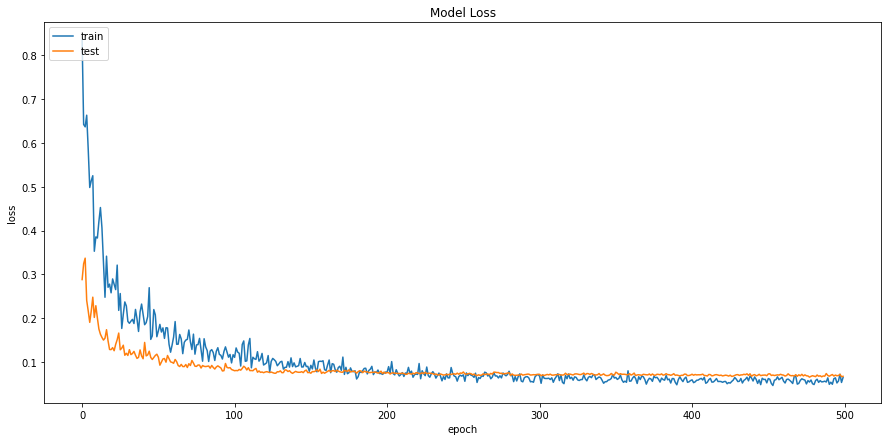

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(histories['qn1'].history['mse'])
plt.plot(histories['qn1'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(15,7))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
df = pd.DataFrame()
df['predicted'] = predictions.flatten()
df['actual'] = y_test

In [ ]:
df

predicted    actual
0    2.072192  1.955000
1    1.743396  2.141667
2    1.716256  2.173333
3    1.900857  1.885000
4    1.467677  1.286667
5    1.492841  1.331667
6    1.537760  1.533333
7    1.520475  1.523333
8    1.528443  1.346667
9    1.559143  1.378333
10   1.646958  1.601667
11   1.828409  1.858333
12   1.906813  1.866667
13   1.739241  1.975000
14   1.575658  1.583333
15   1.707311  1.671667
16   1.640337  1.378333
17   1.625656  1.548333
18   1.745992  2.660000
19   1.534883  1.363333
20   1.538317  1.570000
21   1.933578  1.663333
22   1.766206  1.425000
23   1.803898  1.723333
24   1.492748  1.533333
25   2.168413  1.996667
26   1.487675  1.391667
27   1.656329  1.608333
28   1.868138  2.346667
29   1.743442  1.823333
30   1.512322  1.463333
31   1.872737  1.813333

In [ ]:
count = 0

for i in range(0,len(predictions)):
  if(abs(predictions[i]-y_test[i])<=0.2):
    count += 1

print("number of predictions within acceptable range: " + str(count))
print("percentage of predictions within acceptable range: " + str((count/32)*100) + "%")

number of predictions within acceptable range: 24
percentage of predictions within acceptable range: 75.0%


### Reduced features

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_regression

X_new = SelectKBest(f_regression, k=8).fit_transform(X, y)
print(X_new.shape)
sec = SelectKBest(f_regression, k=8).fit(X, y)
selected = sec.get_support()
print("Selected features: ")
features = ['turns','lap_length','race_laps','race_distance','max_speed','drs_zone','full_throttle_percentage','longest_flatout_section','downforce_level','gear_changes_per_lap','fastest_q','prev_year_1_lap','prev_year_2_lap','prev_year_3_lap','prev_year_4_lap']
for i in range(0,len(selected)):
  if(selected[i]==True):
    print(features[i])

(125, 8)
Selected features: 
turns
lap_length
race_laps
fastest_q
prev_year_1_lap
prev_year_2_lap
prev_year_3_lap
prev_year_4_lap


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new,
                                                                    y,
                                                                    test_size = 0.25,
                                                                    random_state=10)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(93, 8) (93, 1)
(32, 8) (32, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

histories={}

np.random.seed(10)
tf.random.set_seed(10)

l2 = tf.keras.regularizers.l2(1e-3)

print(l2)

# create a network
model = Sequential([
        Dense(10, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(10, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(1)
])

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['qn1'] = model.fit(X_train, y_train,
                             epochs=500,
                             batch_size=4,
                             verbose = 2,
                             validation_data=(X_test, y_test))

Epoch 1/500
24/24 - 0s - loss: 1.1970 - mse: 1.1791 - val_loss: 0.6681 - val_mse: 0.6503
Epoch 2/500
24/24 - 0s - loss: 0.6290 - mse: 0.6113 - val_loss: 0.4035 - val_mse: 0.3860
Epoch 3/500
24/24 - 0s - loss: 0.6785 - mse: 0.6611 - val_loss: 0.3152 - val_mse: 0.2979
Epoch 4/500
24/24 - 0s - loss: 0.6113 - mse: 0.5942 - val_loss: 0.2475 - val_mse: 0.2305
Epoch 5/500
24/24 - 0s - loss: 0.6068 - mse: 0.5899 - val_loss: 0.2252 - val_mse: 0.2084
Epoch 6/500
24/24 - 0s - loss: 0.4616 - mse: 0.4450 - val_loss: 0.1938 - val_mse: 0.1773
Epoch 7/500
24/24 - 0s - loss: 0.5163 - mse: 0.4999 - val_loss: 0.1865 - val_mse: 0.1703
Epoch 8/500
24/24 - 0s - loss: 0.5830 - mse: 0.5669 - val_loss: 0.1960 - val_mse: 0.1801
Epoch 9/500
24/24 - 0s - loss: 0.3599 - mse: 0.3440 - val_loss: 0.1685 - val_mse: 0.1528
Epoch 10/500
24/24 - 0s - loss: 0.4459 - mse: 0.4303 - val_loss: 0.1710 - val_mse: 0.1555
Epoch 11/500
24/24 - 0s - loss: 0.3551 - mse: 0.3397 - val_loss: 0.1563 - val_mse: 0.1410
Epoch 12/500
24/24 

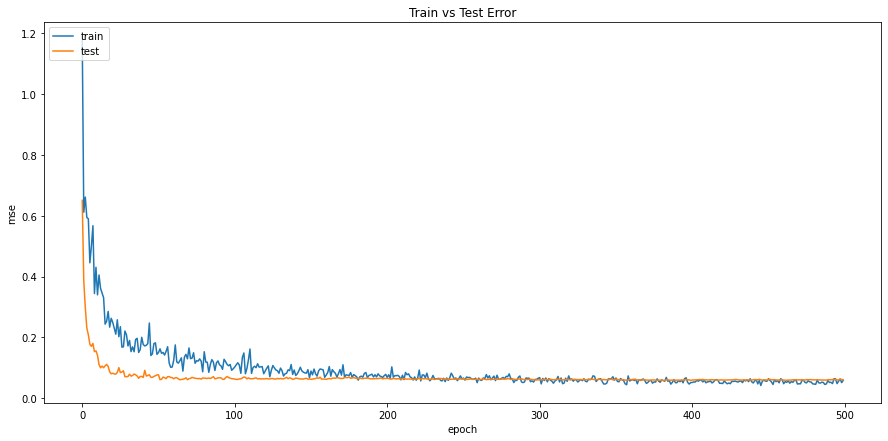

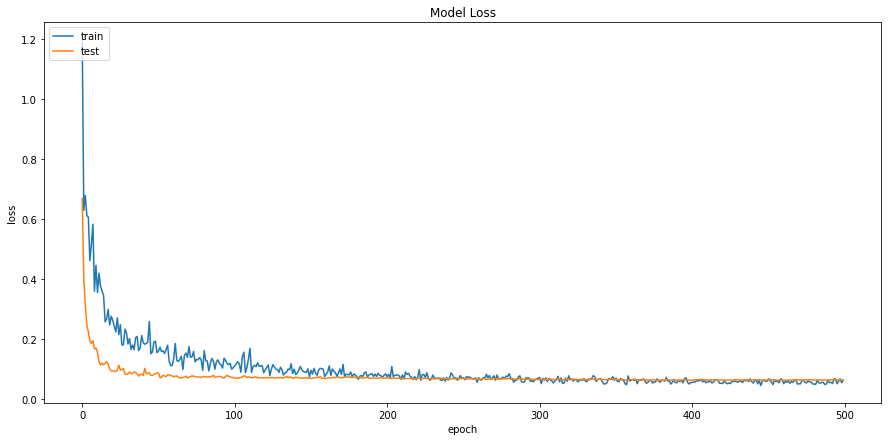

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(histories['qn1'].history['mse'])
plt.plot(histories['qn1'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(15,7))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
count = 0

for i in range(0,len(predictions)):
  if(abs(predictions[i]-y_test[i])<=0.2):
    count += 1

print(count)

24


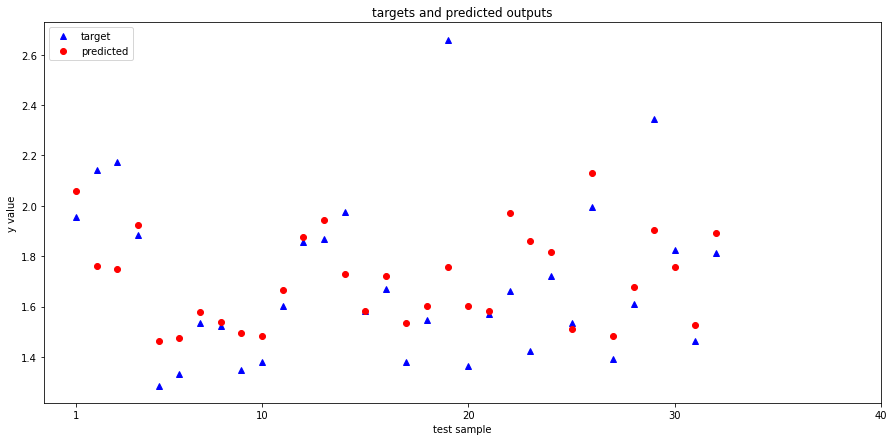

In [ ]:
plt.figure(figsize=(15,7))
for i in range(0,32):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, predictions[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

In [ ]:
df = pd.DataFrame()
df['predicted'] = predictions.flatten()
df['actual'] = y_test
df

predicted    actual
0    2.057255  1.955000
1    1.759929  2.141667
2    1.751159  2.173333
3    1.923391  1.885000
4    1.465129  1.286667
5    1.473523  1.331667
6    1.576949  1.533333
7    1.539563  1.523333
8    1.496483  1.346667
9    1.485026  1.378333
10   1.663899  1.601667
11   1.878143  1.858333
12   1.943640  1.866667
13   1.730510  1.975000
14   1.582129  1.583333
15   1.719683  1.671667
16   1.532993  1.378333
17   1.603345  1.548333
18   1.759099  2.660000
19   1.603343  1.363333
20   1.583258  1.570000
21   1.971071  1.663333
22   1.858933  1.425000
23   1.815632  1.723333
24   1.512542  1.533333
25   2.130556  1.996667
26   1.485063  1.391667
27   1.677306  1.608333
28   1.903796  2.346667
29   1.755417  1.823333
30   1.524913  1.463333
31   1.890916  1.813333

## Driver to new Constructor

In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/DAM Assignment/Cleaned Data/train_q3.csv')
train_data.dropna(inplace=True)
#data.set_index('year', inplace=True)

train_data.head()

driverId  constructorId    year  ... points positionText wins
1       1.0            1.0  2007.0  ...  109.0          2.0  4.0
2       1.0            1.0  2008.0  ...   98.0          1.0  5.0
3       1.0            1.0  2009.0  ...   49.0          5.0  2.0
4       1.0            1.0  2010.0  ...  240.0          4.0  3.0
5       1.0            1.0  2011.0  ...  227.0          5.0  3.0

[5 rows x 25 columns]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 202
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   driverId                  202 non-null    float64
 1   constructorId             202 non-null    float64
 2   year                      202 non-null    float64
 3   raceId                    202 non-null    object 
 4   grid                      202 non-null    object 
 5   positionOrder             202 non-null    object 
 6   statusId                  202 non-null    object 
 7   circuitId                 202 non-null    object 
 8   turns                     202 non-null    object 
 9   lap_length                202 non-null    object 
 10  race_laps                 202 non-null    object 
 11  race_distance             202 non-null    object 
 12  max_speed                 202 non-null    object 
 13  drs_zone                  202 non-null    object 
 14  full_throt

In [ ]:
train_data['driver_error_rate'] = pd.to_numeric(train_data['driver_error_rate'], downcast="float")
train_data['constructor_error_rate'] = pd.to_numeric(train_data['constructor_error_rate'], downcast="float")
train_data['circuit_error_rate'] = pd.to_numeric(train_data['circuit_error_rate'], downcast="float")

In [ ]:
train_data['driver_error_rate'] = train_data['driver_error_rate']*1000
train_data['constructor_error_rate'] = train_data['constructor_error_rate']*100
train_data['circuit_error_rate'] = train_data['circuit_error_rate']*100

train_data.head()

driverId  constructorId    year  ... points positionText wins
1       1.0            1.0  2007.0  ...  109.0          2.0  4.0
2       1.0            1.0  2008.0  ...   98.0          1.0  5.0
3       1.0            1.0  2009.0  ...   49.0          5.0  2.0
4       1.0            1.0  2010.0  ...  240.0          4.0  3.0
5       1.0            1.0  2011.0  ...  227.0          5.0  3.0

[5 rows x 25 columns]

In [ ]:
train_data.drop(['year','raceId','statusId','circuitId','turns','lap_length','race_laps','race_distance','max_speed','drs_zone','full_throttle_percentage','longest_flatout_section','downforce_level','gear_changes_per_lap','label'], 1, inplace=True)
train_data.head()

driverId  constructorId                grid  ... points  positionText  wins
1       1.0            1.0   2.588235294117647  ...  109.0           2.0   4.0
2       1.0            1.0   3.888888888888889  ...   98.0           1.0   5.0
3       1.0            1.0   9.176470588235293  ...   49.0           5.0   2.0
4       1.0            1.0   5.157894736842105  ...  240.0           4.0   3.0
5       1.0            1.0  3.5789473684210527  ...  227.0           5.0   3.0

[5 rows x 10 columns]

In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/DAM Assignment/Cleaned Data/test_q3.csv')
test_data.dropna(inplace=True)
test_data['driver_error_rate'] = pd.to_numeric(test_data['driver_error_rate'], downcast="float")
test_data['constructor_error_rate'] = pd.to_numeric(test_data['constructor_error_rate'], downcast="float")
test_data['circuit_error_rate'] = pd.to_numeric(test_data['circuit_error_rate'], downcast="float")
test_data['driver_error_rate'] = test_data['driver_error_rate']*1000
test_data['constructor_error_rate'] = test_data['constructor_error_rate']*100
test_data['circuit_error_rate'] = test_data['circuit_error_rate']*100
test_data.drop(['year','raceId','statusId','circuitId','turns','lap_length','race_laps','race_distance','max_speed','drs_zone','full_throttle_percentage','longest_flatout_section','downforce_level','gear_changes_per_lap','label'], 1, inplace=True)
test_data.head()

driverId  constructorId                grid  ... points  positionText  wins
1       1.0          131.0   3.473684210526316  ...  189.0           4.0   1.0
2       1.0          131.0  4.2105263157894735  ...  384.0           1.0  11.0
3       1.0          131.0  1.5789473684210527  ...  381.0           1.0  10.0
4       1.0          131.0   4.142857142857143  ...  380.0           2.0  10.0
5       1.0          131.0                 3.6  ...  363.0           1.0   9.0

[5 rows x 10 columns]

In [ ]:
train_label = train_data[['positionText']]
test_label = test_data[['positionText']]
train_data.drop(['positionText'], 1, inplace=True)
test_data.drop(['positionText'], 1, inplace=True)

In [ ]:
train_data.values.shape

(202, 9)

In [ ]:
drivers = test_data['driverId'].values
constructors = test_data['constructorId'].values

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train_data)
train_data = pd.DataFrame(x_scaled, columns = train_data.columns, index=train_data.index)
train_data.head()

driverId  constructorId      grid  ...  circuit_error_rate    points      wins
1       0.0            0.0  0.062262  ...            0.309684  0.274559  0.307692
2       0.0            0.0  0.123376  ...            0.269267  0.246851  0.384615
3       0.0            0.0  0.371826  ...            0.242975  0.123426  0.153846
4       0.0            0.0  0.183004  ...            0.268479  0.604534  0.230769
5       0.0            0.0  0.108813  ...            0.287165  0.571788  0.230769

[5 rows x 9 columns]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(test_data)
test_data = pd.DataFrame(x_scaled, columns = test_data.columns, index=test_data.index)
test_data.head()

driverId  constructorId      grid  ...  circuit_error_rate    points      wins
1       0.0        0.62201  0.088452  ...            0.293018  0.490909  0.090909
2       0.0        0.62201  0.122850  ...            0.249863  0.997403  1.000000
3       0.0        0.62201  0.000000  ...            0.256092  0.989610  0.909091
4       0.0        0.62201  0.119691  ...            0.220670  0.987013  0.909091
5       0.0        0.62201  0.094349  ...            0.235348  0.942857  0.818182

[5 rows x 9 columns]

In [ ]:
X_train = train_data.values
X_test = test_data.values
y_train = train_label.values
y_test = test_label.values

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(202, 9) (202, 1)
(88, 9) (88, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

np.random.seed(10)
tf.random.set_seed(10)

histories={}

l2 = tf.keras.regularizers.l2(1e-3)

print(l2)

checkpoint_filepath = '/content/drive/My Drive/DAM Assignment/models/weights-improvement-{epoch:02d}-{val_mse:.2f}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

# create a network
model = Sequential([
        Dense(25, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(25, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(1)
])

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['qn1'] = model.fit(X_train, y_train,
                             epochs=1000,
                             batch_size=4,
                             shuffle = True,
                             verbose = 2,
                             #callbacks = [model_checkpoint_callback],
                             validation_data=(X_test, y_test))

Epoch 1/1000
51/51 - 0s - loss: 180.1465 - mse: 180.1095 - val_loss: 159.6166 - val_mse: 159.5797
Epoch 2/1000
51/51 - 0s - loss: 142.8424 - mse: 142.8047 - val_loss: 106.6667 - val_mse: 106.6276
Epoch 3/1000
51/51 - 0s - loss: 74.0984 - mse: 74.0571 - val_loss: 40.2932 - val_mse: 40.2496
Epoch 4/1000
51/51 - 0s - loss: 30.8118 - mse: 30.7670 - val_loss: 23.0871 - val_mse: 23.0410
Epoch 5/1000
51/51 - 0s - loss: 24.4480 - mse: 24.4015 - val_loss: 17.5932 - val_mse: 17.5461
Epoch 6/1000
51/51 - 0s - loss: 20.5254 - mse: 20.4783 - val_loss: 14.2431 - val_mse: 14.1956
Epoch 7/1000
51/51 - 0s - loss: 17.8836 - mse: 17.8357 - val_loss: 10.8704 - val_mse: 10.8216
Epoch 8/1000
51/51 - 0s - loss: 18.3982 - mse: 18.3488 - val_loss: 8.8657 - val_mse: 8.8158
Epoch 9/1000
51/51 - 0s - loss: 14.2825 - mse: 14.2323 - val_loss: 7.8387 - val_mse: 7.7879
Epoch 10/1000
51/51 - 0s - loss: 13.2866 - mse: 13.2356 - val_loss: 7.4086 - val_mse: 7.3571
Epoch 11/1000
51/51 - 0s - loss: 15.8409 - mse: 15.7892 -

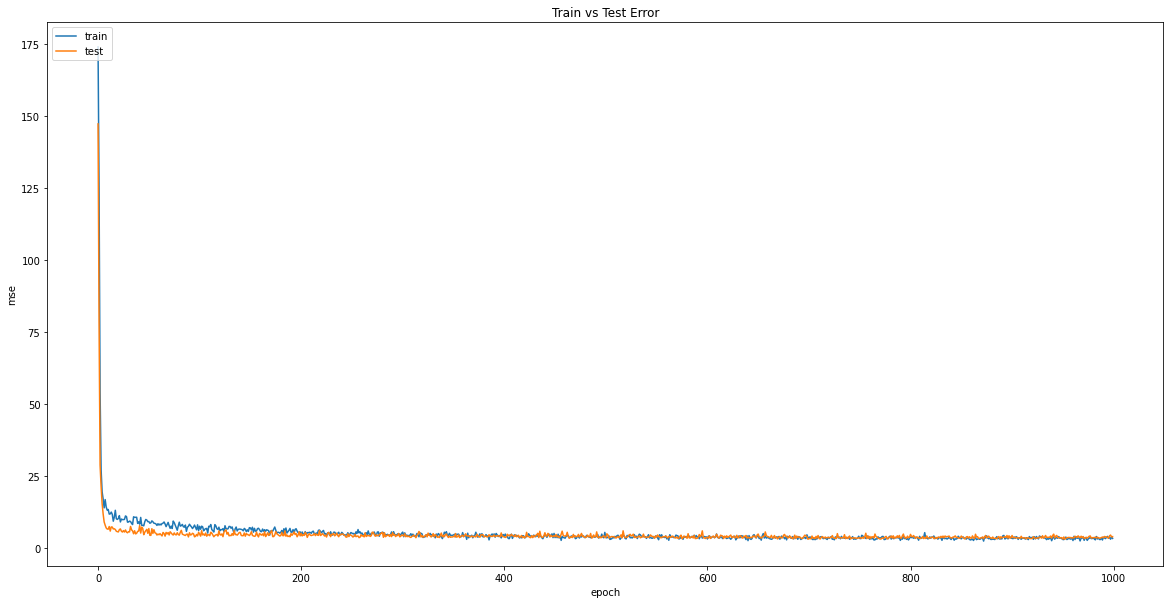

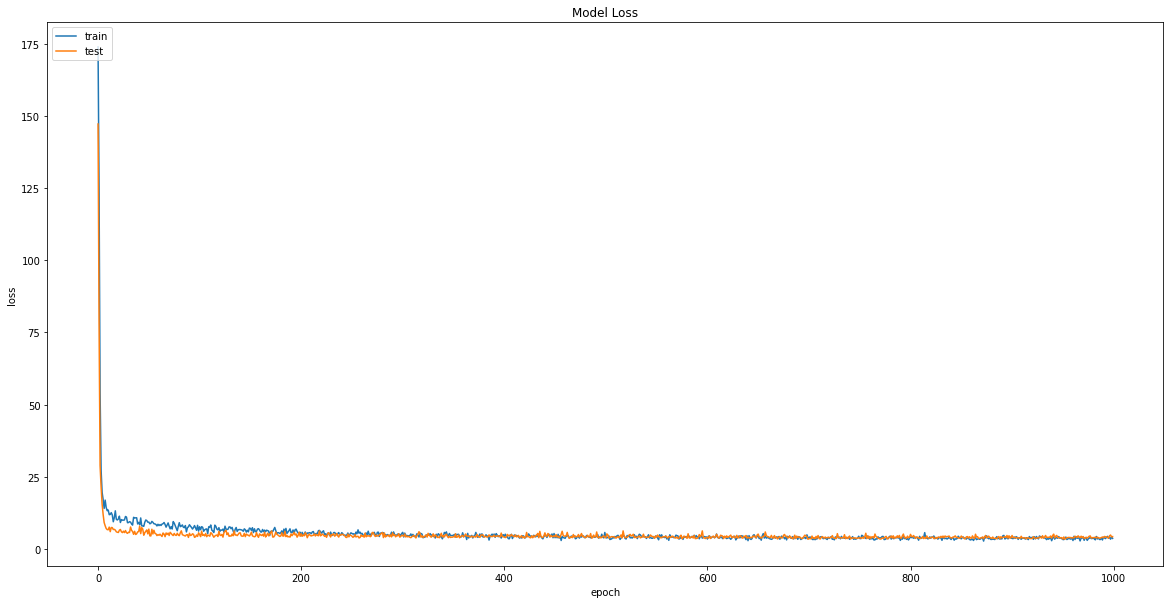

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['mse'])
plt.plot(histories['qn1'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/DAM Assignment/models/weights-improvement-449-2.52.hdf5')

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([[ 3.3320749],
       [ 1.4572319],
       [ 1.4797257],
       [ 1.5190712],
       [ 1.5591756],
       [11.94497  ],
       [ 5.9018106],
       [ 7.4486885],
       [ 6.661966 ],
       [ 3.0740669],
       [ 1.8100562],
       [ 1.7411736],
       [ 1.5596449],
       [ 2.2309067],
       [ 4.0402617],
       [ 3.2540407],
       [ 3.717348 ],
       [ 5.712303 ],
       [16.261143 ],
       [ 3.2790136],
       [ 3.6074405],
       [ 5.5031447],
       [21.645277 ],
       [ 8.322917 ],
       [18.307125 ],
       [ 6.1296268],
       [ 5.7962027],
       [ 9.696369 ],
       [ 9.154446 ],
       [ 9.54205  ],
       [22.587315 ],
       [22.681787 ],
       [19.581371 ],
       [14.188444 ],
       [ 3.8605247],
       [ 2.9669216],
       [ 3.6223161],
       [ 6.099746 ],
       [ 5.4454355],
       [14.279199 ],
       [13.20409  ],
       [23.251308 ],
       [ 3.0696225],
       [ 5.194648 ],
       [ 2.2585344],
       [17.636587 ],
       [ 9.402719 ],
       [17.11

In [ ]:
predictions= np.round(predictions, 0)
predictions

array([[ 3.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 2.],
       [12.],
       [ 6.],
       [ 7.],
       [ 7.],
       [ 3.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 3.],
       [ 4.],
       [ 6.],
       [16.],
       [ 3.],
       [ 4.],
       [ 6.],
       [22.],
       [ 8.],
       [18.],
       [ 6.],
       [ 6.],
       [10.],
       [ 9.],
       [10.],
       [23.],
       [23.],
       [20.],
       [14.],
       [ 4.],
       [ 3.],
       [ 4.],
       [ 6.],
       [ 5.],
       [14.],
       [13.],
       [23.],
       [ 3.],
       [ 5.],
       [ 2.],
       [18.],
       [ 9.],
       [17.],
       [ 8.],
       [24.],
       [20.],
       [25.],
       [ 9.],
       [10.],
       [11.],
       [ 5.],
       [24.],
       [19.],
       [19.],
       [23.],
       [24.],
       [24.],
       [25.],
       [13.],
       [12.],
       [22.],
       [22.],
       [19.],
       [12.],
       [24.],
       [11.],
      

In [ ]:
y_test

array([[ 4.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 1.],
       [11.],
       [ 7.],
       [ 7.],
       [ 9.],
       [ 6.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 4.],
       [ 2.],
       [ 2.],
       [ 6.],
       [22.],
       [ 3.],
       [ 5.],
       [ 8.],
       [20.],
       [ 8.],
       [23.],
       [ 7.],
       [ 6.],
       [11.],
       [11.],
       [10.],
       [21.],
       [21.],
       [18.],
       [13.],
       [ 5.],
       [ 2.],
       [ 5.],
       [ 9.],
       [ 8.],
       [16.],
       [15.],
       [24.],
       [ 3.],
       [ 4.],
       [ 2.],
       [15.],
       [10.],
       [17.],
       [ 9.],
       [23.],
       [19.],
       [26.],
       [ 9.],
       [ 8.],
       [13.],
       [ 5.],
       [27.],
       [16.],
       [21.],
       [25.],
       [25.],
       [26.],
       [24.],
       [13.],
       [13.],
       [22.],
       [19.],
       [16.],
       [14.],
       [25.],
       [10.],
      

In [ ]:
df = pd.DataFrame()
df['predicted'] = predictions.flatten()
df['actual'] = y_test
df['Driver'] = drivers
df['Contructors'] = constructors

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

predicted  actual  Driver  Contructors
0         3.0     4.0     1.0        131.0
1         1.0     1.0     1.0        131.0
2         1.0     1.0     1.0        131.0
3         2.0     2.0     1.0        131.0
4         2.0     1.0     1.0        131.0
5        12.0    11.0     2.0          4.0
6         6.0     7.0     3.0        131.0
7         7.0     7.0     3.0        131.0
8         7.0     9.0     3.0        131.0
9         3.0     6.0     3.0        131.0
10        2.0     2.0     3.0        131.0
11        2.0     2.0     3.0        131.0
12        2.0     1.0     3.0        131.0
13        2.0     2.0     4.0          6.0
14        4.0     4.0     4.0          6.0
15        3.0     2.0     4.0          6.0
16        4.0     2.0     4.0          6.0
17        6.0     6.0     4.0          6.0
18       16.0    22.0     5.0        208.0
19        3.0     3.0     8.0        208.0
20        4.0     5.0     8.0        208.0
21        6.0     8.0     9.0          4.0
22       22.0    20.0    10.0        206.0
23        8.0     8.0    11.0         16.0
24       18.0    23.0    11.0         16.0
25        6.0     7.0    13.0          3.0
26        6.0     6.0    13.0          3.0
27       10.0    11.0    13.0          3.0
28        9.0    11.0    13.0          3.0
29       10.0    10.0    14.0          1.0
30       23.0    21.0    15.0        205.0
31       23.0    21.0    15.0        205.0
32       20.0    18.0    16.0         15.0
33       14.0    13.0    17.0         19.0
34        4.0     5.0    18.0          1.0
35        3.0     2.0    18.0          1.0
36        4.0     5.0    18.0          1.0
37        6.0     9.0    18.0          1.0
38        5.0     8.0    18.0          1.0
39       14.0    16.0    18.0          1.0
40       13.0    15.0    18.0          1.0
41       23.0    24.0    18.0          1.0
42        3.0     3.0    20.0          6.0
43        5.0     4.0    20.0          6.0
44        2.0     2.0    20.0          6.0
45       18.0    15.0    21.0          6.0
46        9.0    10.0    22.0          3.0
47       17.0    17.0    22.0          3.0
48        8.0     9.0    23.0          3.0
49       24.0    23.0    24.0        164.0
50       20.0    19.0    27.0         18.0
51       25.0    26.0    29.0        164.0
52        9.0     9.0    30.0        131.0
53       10.0     8.0    30.0        131.0
54       11.0    13.0    30.0        131.0
55        5.0     5.0    31.0          3.0
56       24.0    27.0    32.0        164.0
57       19.0    16.0    33.0         17.0
58       19.0    21.0    35.0          4.0
59       23.0    25.0    37.0        164.0
60       24.0    25.0    38.0         18.0
61       24.0    26.0    39.0        164.0
62       25.0    24.0    39.0        164.0
63       13.0    13.0   154.0        210.0
64       12.0    13.0   154.0        210.0
65       22.0    22.0   155.0        207.0
66       22.0    19.0   808.0        207.0
67       19.0    16.0   813.0        208.0
68       12.0    14.0   813.0        208.0
69       24.0    25.0   814.0          3.0
70       11.0    10.0   815.0         10.0
71       10.0     9.0   815.0         10.0
72        8.0     7.0   815.0         10.0
73        7.0     7.0   815.0         10.0
74        3.0     3.0   817.0          9.0
75        7.0     8.0   817.0          9.0
76        4.0     3.0   817.0          9.0
77        4.0     5.0   817.0          9.0
78        2.0     3.0   822.0        131.0
79       13.0    14.0   825.0        210.0
80        8.0     7.0   826.0          9.0
81       13.0    14.0   826.0          9.0
82       16.0    18.0   828.0         15.0
83       21.0    22.0   828.0         15.0
84       20.0    20.0   828.0         15.0
85        4.0     5.0   830.0          9.0
86        4.0     6.0   830.0          9.0
87       18.0    18.0   836.0         15.0

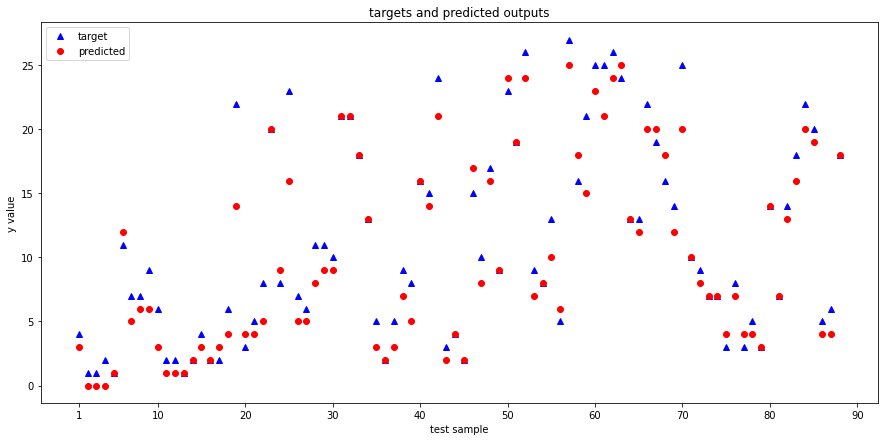

In [ ]:
plt.figure(figsize=(15,7))
for i in range(0,88):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, predictions[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40,50,60,70,80,90])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

In [ ]:
count = 0

for i in range(0,len(predictions)):
  if(abs(predictions[i]-y_test[i])<=1):
    count += 1

print("number of predictions within acceptable range: " + str(count))
print("percentage of predictions within acceptable range (1 position difference): " + str((count/88)*100) + "%")

number of predictions within acceptable range: 54
percentage of predictions within acceptable range (1 position difference): 61.36363636363637%


In [ ]:
count = 0

for i in range(0,len(predictions)):
  if(abs(predictions[i]-y_test[i])<=2):
    count += 1

print("number of predictions within acceptable range: " + str(count))
print("percentage of predictions within acceptable range (2 position difference): " + str((count/88)*100) + "%")

number of predictions within acceptable range: 76
percentage of predictions within acceptable range (2 position difference): 86.36363636363636%


## Question 4

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(10)

data = pd.read_csv('/content/drive/My Drive/DAM Assignment/Cleaned Data/question4.csv')
data.dropna(inplace=True)
data.head()

driverId  constructorId  circuitId  Did not finish  Podium  Pos 4 to 10  \
0         1            131          1            0.33    0.33         0.33   
1         1            131          3            0.00    0.67         0.33   
2         1            131         17            0.00    1.00         0.00   
3         1            131         71            0.00    1.00         0.00   
4         1            131          4            0.00    0.67         0.00   

   Accident / Collision    SC  Dry  Wet  pitStop timing (avg)  \
0                   0.0  0.67  1.0  0.0           14691.00000   
1                   0.0  0.33  1.0  0.0           23758.00000   
2                   0.0  0.33  1.0  0.0           21944.66667   
3                   0.0  0.50  1.0  0.0               0.00000   
4                   0.0  0.00  1.0  0.0           21670.66667   

   pitStop timing prop(driver)  grid  driver_error_rate  \
0                     0.073046     1           0.009615   
1                     0.073046     1           0.009615   
2                     0.073046    22           0.009615   
3                     0.073046    10           0.009615   
4                     0.073046     1           0.009615   

   constructor_error_rate  circuit_error_rate  race_class  
0                0.073718            0.126246           1  
1                0.073718            0.028571           1  
2                0.073718            0.046358           2  
3                0.073718            0.108434           1  
4                0.073718            0.069536           0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   driverId                     506 non-null    int64  
 1   constructorId                506 non-null    int64  
 2   circuitId                    506 non-null    int64  
 3   Did not finish               506 non-null    float64
 4   Podium                       506 non-null    float64
 5   Pos 4 to 10                  506 non-null    float64
 6   Accident / Collision         506 non-null    float64
 7   SC                           506 non-null    float64
 8   Dry                          506 non-null    float64
 9   Wet                          506 non-null    float64
 10  pitStop timing (avg)         506 non-null    float64
 11  pitStop timing prop(driver)  506 non-null    float64
 12  grid                         506 non-null    int64  
 13  driver_error_rate   

In [ ]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1:]

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns = X.columns, index=X.index)
X.head()

driverId  constructorId  circuitId  Did not finish  Podium  Pos 4 to 10  \
0       0.0        0.62201   0.000000            0.33    0.33         0.33   
1       0.0        0.62201   0.027778            0.00    0.67         0.33   
2       0.0        0.62201   0.222222            0.00    1.00         0.00   
3       0.0        0.62201   0.972222            0.00    1.00         0.00   
4       0.0        0.62201   0.041667            0.00    0.67         0.00   

   Accident / Collision    SC  Dry  Wet  pitStop timing (avg)  \
0                   0.0  0.67  1.0  0.0              0.500255   
1                   0.0  0.33  1.0  0.0              0.809003   
2                   0.0  0.33  1.0  0.0              0.747256   
3                   0.0  0.50  1.0  0.0              0.000000   
4                   0.0  0.00  1.0  0.0              0.737926   

   pitStop timing prop(driver)      grid  driver_error_rate  \
0                          1.0  0.045455           0.060666   
1                          1.0  0.045455           0.060666   
2                          1.0  1.000000           0.060666   
3                          1.0  0.454545           0.060666   
4                          1.0  0.045455           0.060666   

   constructor_error_rate  circuit_error_rate  
0                0.013323            0.749211  
1                0.013323            0.034828  
2                0.013323            0.164915  
3                0.013323            0.618935  
4                0.013323            0.334443

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
print(X_new.shape)
sec = SelectKBest(chi2, k=10).fit(X, y)
selected = sec.get_support()
print("Selected features: ")
features = ['driverId','constructorId','circuitId','Did not finish','Podium','Pos 4 to 10','Accident / Collision','SC','Dry','Wet','pitStop timing (avg)','pitStop timing prop(driver)','start_grid','driver_error_rate','constructor_error_rate','circuit_error_rate']
for i in range(0,len(selected)):
  if(selected[i]==True):
    print(features[i])

(506, 10)
Selected features: 
driverId
constructorId
Podium
Pos 4 to 10
Wet
pitStop timing (avg)
pitStop timing prop(driver)
start_grid
driver_error_rate
constructor_error_rate


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_test_inverse = min_max_scaler.inverse_transform(X_test)

In [ ]:
drivers = []
constructors = []

for i in X_test_inverse:
  drivers.append(i[0])
  constructors.append(i[1])

In [ ]:
drivers = np.round(drivers, 0)
constructors = np.round(constructors, 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback

histories = {}

np.random.seed(10)
tf.random.set_seed(10)

# create the model
l2 = tf.keras.regularizers.l2(l2=1e-6)

model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l2),
    Dropout(rate=0.2),
    Dense(32, activation='relu', kernel_regularizer=l2),
    Dropout(rate=0.2),
    Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.SGD(lr=0.001, decay = 1e-6)

model.compile(optimizer=opt,
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = '/content/drive/My Drive/DAM Assignment/models/qn4.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# train the model
histories['qn1'] =model.fit(X_train, y_train,
                            epochs=1000,
                            verbose = 2,
                            batch_size=4,
                            callbacks = [model_checkpoint_callback],
                            validation_data=(X_test, y_test))

Epoch 1/1000
101/101 - 0s - loss: 1.3882 - accuracy: 0.2550 - val_loss: 1.3725 - val_accuracy: 0.3039
Epoch 2/1000
101/101 - 0s - loss: 1.3787 - accuracy: 0.2426 - val_loss: 1.3691 - val_accuracy: 0.3039
Epoch 3/1000
101/101 - 0s - loss: 1.3836 - accuracy: 0.2475 - val_loss: 1.3661 - val_accuracy: 0.3039
Epoch 4/1000
101/101 - 0s - loss: 1.3859 - accuracy: 0.2574 - val_loss: 1.3630 - val_accuracy: 0.3137
Epoch 5/1000
101/101 - 0s - loss: 1.3573 - accuracy: 0.2822 - val_loss: 1.3603 - val_accuracy: 0.3235
Epoch 6/1000
101/101 - 0s - loss: 1.3554 - accuracy: 0.3218 - val_loss: 1.3578 - val_accuracy: 0.3235
Epoch 7/1000
101/101 - 0s - loss: 1.3706 - accuracy: 0.2698 - val_loss: 1.3555 - val_accuracy: 0.3431
Epoch 8/1000
101/101 - 0s - loss: 1.3570 - accuracy: 0.2995 - val_loss: 1.3533 - val_accuracy: 0.3431
Epoch 9/1000
101/101 - 0s - loss: 1.3488 - accuracy: 0.3490 - val_loss: 1.3511 - val_accuracy: 0.3627
Epoch 10/1000
101/101 - 0s - loss: 1.3469 - accuracy: 0.3614 - val_loss: 1.3491 - 

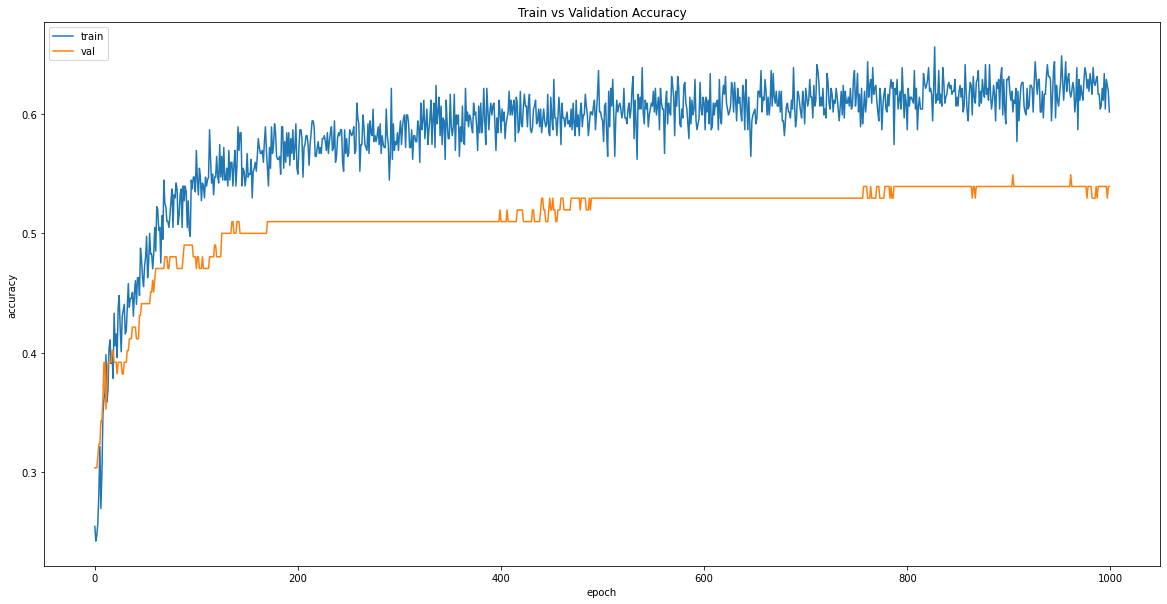

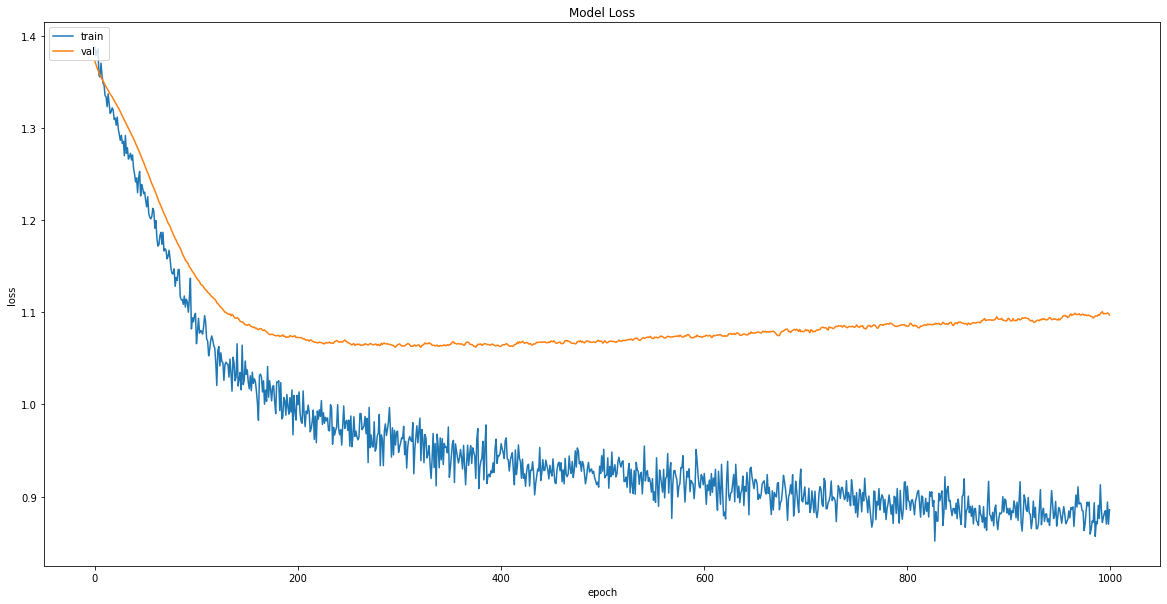

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['accuracy'])
plt.plot(histories['qn1'].history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/DAM Assignment/models/qn4.hdf5')

In [ ]:
predictions = model.predict(X_test)

In [ ]:
labels = []

for i in predictions:
  labels.append(np.argmax(i))


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
y_test['predicted'] = labels
y_test['drivers'] = drivers
y_test['constructors'] = constructors
y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

race_class  predicted  drivers  constructors
329           3          2      4.0           1.0
371           0          2     18.0           1.0
219           2          1    817.0           9.0
403           3          3    828.0          15.0
78            1          1     20.0           6.0
15            1          1      1.0         131.0
487           3          3    154.0         210.0
340           2          2      4.0           1.0
310           3          2    815.0          10.0
102           0          2      8.0           6.0
418           3          3    828.0          15.0
411           3          3    828.0          15.0
446           3          3    836.0          15.0
386           0          3    828.0          15.0
162           1          1    822.0         131.0
299           2          2    815.0          10.0
480           0          3    154.0         210.0
196           2          2     13.0           3.0
175           2          2     13.0           3.0
37            2          2      1.0         131.0
320           2          2    815.0          10.0
171           2          1    822.0         131.0
107           2          2      8.0           6.0
278           0          3    826.0           5.0
45            2          1      3.0         131.0
367           0          2     18.0           1.0
21            1          1      1.0         131.0
153           3          2    822.0           3.0
97            0          2      8.0           6.0
113           2          2      8.0           6.0
478           3          3    154.0         210.0
459           3          3    837.0         209.0
247           1          2    817.0           9.0
241           2          3    817.0           9.0
173           1          1    822.0         131.0
363           3          2     18.0           1.0
400           0          3    828.0          15.0
372           3          2     18.0           1.0
430           0          3    836.0         209.0
475           0          3    154.0         210.0
293           0          2    815.0          10.0
46            2          1      3.0         131.0
330           0          2      4.0           1.0
474           2          3    154.0         210.0
342           0          2      4.0           1.0
1             1          1      1.0         131.0
297           2          2    815.0          10.0
154           0          2    822.0           3.0
144           3          2    822.0           3.0
100           1          1      8.0           6.0
155           1          1    822.0         131.0
495           3          3    154.0         210.0
230           2          2    817.0           9.0
253           2          3    826.0           9.0
134           1          2      8.0           6.0
12            1          1      1.0         131.0
331           3          2      4.0           1.0
346           3          2      4.0           1.0
410           3          3    828.0          15.0
210           3          2     13.0           3.0
352           0          2      4.0           1.0
319           2          2    815.0          10.0
303           2          2    815.0          10.0
229           1          2    817.0           9.0
469           3          3    154.0         210.0
188           3          2     13.0           3.0
451           3          3    836.0          15.0
10            1          2      1.0         131.0
409           3          3    828.0          15.0
205           2          2     13.0           3.0
76            1          1     20.0           6.0
75            2          2     20.0           6.0
65            0          2     20.0           6.0
344           0          2      4.0           1.0
481           3          2    154.0         210.0
387           3          3    828.0          15.0
233           2          2    817.0           9.0
206           3          2     13.0           3.0
90            0          1     20.0           6.0
497  

In [ ]:
# 0 is DNF
# 1 is podium
# 2 is 4 to 10
# 3 is finished(above 10th place)

In [ ]:
predicted = y_test['predicted'].values
actual = y_test['race_class'].values

actual_DNF = 0
correct_DNF = 0
actual_podiums = 0
correct_podiums = 0
actual_pwp = 0
correct_pwp = 0
actual_fin = 0
correct_fin = 0
count = 0
wrong = 0

for i in range(0,len(actual)):
  if actual[i] == 0:
    actual_DNF += 1
  elif actual[i] == 1:
    actual_podiums += 1
  elif actual[i] == 2:
    actual_pwp += 1
  elif actual[i] == 3:
    actual_fin += 1
  
  if actual[i] == 0 and predicted[i]==0:
    correct_DNF += 1
  elif actual[i] == 1 and predicted[i]==1:
    correct_podiums += 1
  elif actual[i] == 2 and predicted[i]==2:
    correct_pwp += 1
  elif actual[i] == 3 and predicted[i]==3:
    correct_fin += 1

  if actual[i] == predicted[i]:
    count += 1

  if actual[i] != predicted[i] and actual[i]!=0:
    wrong += 1

print("percentage correct DNF: " + str((correct_DNF/actual_DNF)*100) + '%')
print("percentage correct podiums: " + str((correct_podiums/actual_podiums)*100) + '%')
print("percentage correct 4th to 10th: " + str((correct_pwp/actual_pwp)*100) + '%')
print("percentage correct finished more than 10th: " + str((correct_fin/actual_fin)*100) + '%')
print("Number of DNFs: " + str(actual_DNF) )
print("percentage of correct predictions: " + str((count/len(actual))*100) + '%')
print("percentage of correct predictions if exclude DNFs: " + str((count/(len(actual)-actual_DNF))*100) + '%')
print("Percentage of DNFs: " + str((actual_DNF/len(actual))*100) + '%')

percentage correct DNF: 0.0%
percentage correct podiums: 72.72727272727273%
percentage correct 4th to 10th: 73.33333333333333%
percentage correct finished more than 10th: 60.0%
Number of DNFs: 20
percentage of correct predictions: 54.90196078431373%
percentage of correct predictions if exclude DNFs: 68.29268292682927%
Percentage of DNFs: 19.607843137254903%


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(10)

data = pd.read_csv('/content/drive/My Drive/DAM Assignment/Cleaned Data/question4.csv')
data.dropna(inplace=True)
data.head()

driverId  constructorId  ...  circuit_error_rate  race_class
0         1            131  ...            0.126246           1
1         1            131  ...            0.028571           1
2         1            131  ...            0.046358           2
3         1            131  ...            0.108434           1
4         1            131  ...            0.069536           0

[5 rows x 17 columns]

In [ ]:
data = data[data.race_class != 0]
data.head()

driverId  constructorId  ...  circuit_error_rate  race_class
0         1            131  ...            0.126246           1
1         1            131  ...            0.028571           1
2         1            131  ...            0.046358           2
3         1            131  ...            0.108434           1
5         1            131  ...            0.160535           1

[5 rows x 17 columns]

In [ ]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1:]

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns = X.columns, index=X.index)
X.head()

driverId  constructorId  ...  constructor_error_rate  circuit_error_rate
0       0.0        0.62201  ...                0.013323            0.749211
1       0.0        0.62201  ...                0.013323            0.034828
2       0.0        0.62201  ...                0.013323            0.164915
3       0.0        0.62201  ...                0.013323            0.618935
5       0.0        0.62201  ...                0.013323            1.000000

[5 rows x 16 columns]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
print(X_new.shape)
sec = SelectKBest(chi2, k=10).fit(X, y)
selected = sec.get_support()
print("Selected features: ")
features = ['driverId','constructorId','circuitId','Did not finish','Podium','Pos 4 to 10','Accident / Collision','SC','Dry','Wet','pitStop timing (avg)','pitStop timing prop(driver)','start_grid','driver_error_rate','constructor_error_rate','circuit_error_rate']
for i in range(0,len(selected)):
  if(selected[i]==True):
    print(features[i])

(412, 10)
Selected features: 
driverId
constructorId
Did not finish
Podium
Pos 4 to 10
pitStop timing (avg)
pitStop timing prop(driver)
start_grid
driver_error_rate
constructor_error_rate


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_test_inverse = min_max_scaler.inverse_transform(X_test)

In [ ]:
drivers = []
constructors = []

for i in X_test_inverse:
  drivers.append(i[0])
  constructors.append(i[1])

In [ ]:
drivers = np.round(drivers, 0)
constructors = np.round(constructors, 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback

histories = {}

np.random.seed(10)
tf.random.set_seed(10)

# create the model
l2 = tf.keras.regularizers.l2(l2=1e-6)

model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l2),
    Dropout(rate=0.2),
    Dense(32, activation='relu', kernel_regularizer=l2),
    Dropout(rate=0.2),
    Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.SGD(lr=0.001, decay = 1e-6)

model.compile(optimizer=opt,
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = '/content/drive/My Drive/DAM Assignment/models/qn4_alt.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# train the model
histories['qn1'] =model.fit(X_train, y_train,
                            epochs=1000,
                            verbose = 2,
                            batch_size=4,
                            callbacks = [model_checkpoint_callback],
                            validation_data=(X_test, y_test))

Epoch 1/1000
83/83 - 0s - loss: 1.3380 - accuracy: 0.2796 - val_loss: 1.3249 - val_accuracy: 0.3133
Epoch 2/1000
83/83 - 0s - loss: 1.3072 - accuracy: 0.3435 - val_loss: 1.3060 - val_accuracy: 0.3253
Epoch 3/1000
83/83 - 0s - loss: 1.2875 - accuracy: 0.3465 - val_loss: 1.2878 - val_accuracy: 0.3253
Epoch 4/1000
83/83 - 0s - loss: 1.2808 - accuracy: 0.3465 - val_loss: 1.2711 - val_accuracy: 0.3253
Epoch 5/1000
83/83 - 0s - loss: 1.2531 - accuracy: 0.3708 - val_loss: 1.2545 - val_accuracy: 0.3133
Epoch 6/1000
83/83 - 0s - loss: 1.2400 - accuracy: 0.3465 - val_loss: 1.2393 - val_accuracy: 0.3133
Epoch 7/1000
83/83 - 0s - loss: 1.2241 - accuracy: 0.3556 - val_loss: 1.2254 - val_accuracy: 0.3133
Epoch 8/1000
83/83 - 0s - loss: 1.2200 - accuracy: 0.3739 - val_loss: 1.2118 - val_accuracy: 0.3253
Epoch 9/1000
83/83 - 0s - loss: 1.2073 - accuracy: 0.3830 - val_loss: 1.1990 - val_accuracy: 0.3373
Epoch 10/1000
83/83 - 0s - loss: 1.1866 - accuracy: 0.4438 - val_loss: 1.1865 - val_accuracy: 0.3614

In [1]:
plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['accuracy'])
plt.plot(histories['qn1'].history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: ignored

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/DAM Assignment/models/qn4.hdf5')

In [ ]:
predictions = model.predict(X_test)

In [ ]:
labels = []

for i in predictions:
  labels.append(np.argmax(i))

In [ ]:
drivers = np.round(drivers, 0)
constructors = np.round(constructors, 0)

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
y_test['predicted'] = labels
y_test['drivers'] = drivers
y_test['constructors'] = constructors
y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

race_class  predicted  drivers  constructors
461           3          3    837.0         209.0
193           2          2     13.0           3.0
265           3          3    826.0           5.0
399           3          3    828.0          15.0
408           3          3    828.0          15.0
487           3          3    154.0         210.0
170           2          2    822.0         131.0
11            1          1      1.0         131.0
23            1          1      1.0         131.0
301           2          2    815.0          10.0
454           3          2    836.0          15.0
64            1          2     20.0           6.0
281           3          3    826.0           5.0
223           1          1    817.0           9.0
423           3          3    836.0         209.0
83            2          2     20.0           6.0
305           2          2    815.0          10.0
186           2          2     13.0           3.0
14            1          1      1.0         131.0
213           2          2    817.0           9.0
416           3          3    828.0          15.0
39            1          1      3.0         131.0
473           3          2    154.0         210.0
57            1          1      3.0         131.0
165           1          1    822.0         131.0
328           2          2      4.0           1.0
224           2          2    817.0           9.0
500           3          3    154.0         210.0
456           3          3    836.0          15.0
364           2          3     18.0           1.0
452           3          3    836.0          15.0
275           2          3    826.0           5.0
100           1          2      8.0           6.0
17            1          1      1.0         131.0
346           3          2      4.0           1.0
406           3          3    828.0          15.0
351           2          2      4.0           1.0
161           1          1    822.0         131.0
81            1          2     20.0           6.0
314           2          2    815.0          10.0
435           3          3    836.0         209.0
85            1          1     20.0           6.0
321           2          2    815.0          10.0
443           3          3    836.0          15.0
348           2          2      4.0           1.0
173           1          1    822.0         131.0
246           1          1    817.0           9.0
469           3          3    154.0         210.0
66            2          2     20.0           6.0
393           3          3    828.0          15.0
505           3          3    154.0         210.0
7             1          1      1.0         131.0
1             1          1      1.0         131.0
366           2          3     18.0           1.0
164           1          2    822.0         131.0
239           1          2    817.0           9.0
310           3          2    815.0          10.0
150           2          2    822.0           3.0
269           3          3    826.0           5.0
319           2          2    815.0          10.0
215           2          2    817.0           9.0
72            2          2     20.0           6.0
204           2          2     13.0           3.0
141           3          2    822.0           3.0
152           2          2    822.0           3.0
211           2          2     13.0           3.0
52            1          1      3.0         131.0
55            1          1      3.0         131.0
28            1          1      1.0         131.0
48            1          1      3.0         131.0
153           3          2    822.0           3.0
5             1          1      1.0         131.0
288           3          2    815.0          10.0
447           3          3    836.0          15.0
139           2          2    822.0           3.0
264           2          3    826.0           5.0
6             1          1      1.0         131.0
199           2          2     13.0           3.0
365           2          2     18.0           1.0
111  

In [ ]:
predicted = y_test['predicted'].values
actual = y_test['race_class'].values

actual_DNF = 0
correct_DNF = 0
actual_podiums = 0
correct_podiums = 0
actual_pwp = 0
correct_pwp = 0
actual_fin = 0
correct_fin = 0
count = 0
wrong = 0

for i in range(0,len(actual)):
  if actual[i] == 0:
    actual_DNF += 1
  elif actual[i] == 1:
    actual_podiums += 1
  elif actual[i] == 2:
    actual_pwp += 1
  elif actual[i] == 3:
    actual_fin += 1
  
  if actual[i] == 0 and predicted[i]==0:
    correct_DNF += 1
  elif actual[i] == 1 and predicted[i]==1:
    correct_podiums += 1
  elif actual[i] == 2 and predicted[i]==2:
    correct_pwp += 1
  elif actual[i] == 3 and predicted[i]==3:
    correct_fin += 1

  if actual[i] == predicted[i]:
    count += 1

  if actual[i] != predicted[i] and actual[i]!=0:
    wrong += 1

print("percentage correct podiums: " + str((correct_podiums/actual_podiums)*100) + '%')
print("percentage correct 4th to 10th: " + str((correct_pwp/actual_pwp)*100) + '%')
print("percentage correct finished more than 10th: " + str((correct_fin/actual_fin)*100) + '%')
print("percentage of correct predictions: " + str((count/len(actual))*100) + '%')

percentage correct podiums: 80.76923076923077%
percentage correct 4th to 10th: 87.09677419354838%
percentage correct finished more than 10th: 73.07692307692307%
percentage of correct predictions: 80.72289156626506%
